In [2]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\LENOVO\Documents\B TECH SEM 5\ProjectSEC\clean_spam_email_dataset.csv')
print(df.head())

                                             message  label
0  Author: allison\nDate: Fri Jun 29 10:33:22 200...      0
1  I expect to be here. 713 276 7374. Maybe a win...      0
2  on mon escapenumber escapenumber escapenumber ...      0
3  ['free play whether better off for some of str...      1
4  Thanks for the reply. Please see embedded resp...      0


In [3]:
df.shape


(555225, 2)

In [4]:
df['label'].value_counts()

label
0    331327
1    223898
Name: count, dtype: int64

In [5]:
df.duplicated().sum()

np.int64(42756)

In [6]:
df = df.drop_duplicates(subset ="message")

In [7]:
df

,message,label
0,Author: allison\nDate: Fri Jun 29 10:33:22 200...,0
1,I expect to be here. 713 276 7374. Maybe a win...,0
2,on mon escapenumber escapenumber escapenumber ...,0
3,['free play whether better off for some of str...,1
4,Thanks for the reply. Please see embedded resp...,0
...,...,...
555220,It was so nice to hear from you. I am glad all...,0
555221,----- Richard B Sanders/HOU/ECT on 12/01/2000...,0
555222,Louise/John: These changes are consistent with...,0
555223,['Anatrim - the most effective flesh loss blen...,1


In [8]:
df['label'].value_counts()

label
0    331324
1    181140
Name: count, dtype: int64

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meruvulikith/190k-spam-ham-email-dataset-for-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\LENOVO\.cache\kagglehub\datasets\meruvulikith\190k-spam-ham-email-dataset-for-classification\versions\1


In [10]:
dataset_path_190k = r"C:\Users\LENOVO\.cache\kagglehub\datasets\meruvulikith\190k-spam-ham-email-dataset-for-classification\versions\1"

In [12]:
import os

In [13]:
files = os.listdir(dataset_path_190k)

In [14]:
for files in files :
    print(files)

spam_Emails_data.csv


In [27]:
df_190 = pd.read_csv(os.path.join(dataset_path_190k,"spam_Emails_data.csv"))

In [28]:
df_190['label'].value_counts()

label
Ham     102160
Spam     91692
Name: count, dtype: int64

In [29]:
df_190 = df_190.rename(columns={"text": "message"})


In [30]:
df_190["label"] = df_190["label"].map({"Ham": 0, "Spam": 1})


In [31]:
df_190["label"].value_counts()


label
0    102160
1     91692
Name: count, dtype: int64

In [32]:
df_190

,label,message
0,1,viiiiiiagraaaa\nonly for the ones that want to...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
3,1,start increasing your odds of success & live s...
4,0,author jra date escapenumber escapenumber esca...
...,...,...
193847,0,on escapenumber escapenumber escapenumber rob ...
193848,1,we have everything you need escapelong cialesc...
193849,0,hi quick question say i have a date variable i...
193850,1,thank you for your loan request which we recie...


In [33]:
common_rows = df.merge(df_190)


In [34]:
common_rows

,message,label
0,on mon escapenumber escapenumber escapenumber ...,0
1,"andrea ,\nwe finished the the costless collar ...",0
2,escapelong escapelong escapelong escapelong es...,1
3,april escapenumber escapenumber escapenumber e...,1
4,dear valued member with this letter we are pre...,1
...,...,...
130360,all replic handbags are on sale now we are the...,1
130361,"just to clarify , i was in the february 2000 r...",0
130362,enron troubles only the tip of the iceberg ?\n...,0
130363,"mark your calendar and lace up your dancin  ,...",0


In [35]:
df_cleaned = df.merge(df_190, how="left", indicator=True)
df_cleaned = df_cleaned[df_cleaned["_merge"] == "left_only"].drop(columns="_merge")


In [37]:
df_cleaned['label'].value_counts()

label
0    292649
1     89450
Name: count, dtype: int64

In [38]:
df_cleaned.duplicated().sum()

np.int64(0)

In [39]:
df_cleaned

,message,label
0,Author: allison\nDate: Fri Jun 29 10:33:22 200...,0
1,I expect to be here. 713 276 7374. Maybe a win...,0
3,['free play whether better off for some of str...,1
4,Thanks for the reply. Please see embedded resp...,0
6,"Hi,\n\nGuido van Rossum python.org> writes:\n...",0
...,...,...
512459,It was so nice to hear from you. I am glad all...,0
512460,----- Richard B Sanders/HOU/ECT on 12/01/2000...,0
512461,Louise/John: These changes are consistent with...,0
512462,['Anatrim - the most effective flesh loss blen...,1


In [40]:
minority_count = len(df_cleaned[df_cleaned["label"] == 1])
target_majority = int((0.70 / 0.30) * minority_count)

df_majority = df_cleaned[df_cleaned["label"] == 0]
df_minority = df_cleaned[df_cleaned["label"] == 1]

df_majority_down = df_majority.sample(target_majority, random_state=42)

df_partially_balanced = pd.concat([df_majority_down, df_minority]).sample(frac=1, random_state=42)


In [43]:
df_partially_balanced['label'].value_counts()

label
0    208716
1     89450
Name: count, dtype: int64

In [44]:
df = df_partially_balanced

In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Documents\B TECH SEM 5\ProjectSEC\email_data.csv")

In [86]:
df

,message,label,text_length,word_count
0,['Fabulous discounts from CanadianPharmacy. 50...,1,554,77
1,http://houston.cowparade.net/,0,29,1
2,=================================\n\nGuarantee...,1,773,103
3,Thanks for your help! ---------------------- ...,0,827,144
4,Start Date: 10/13/01; HourAhead hour: 23; No a...,0,707,81
...,...,...,...,...
298161,"thanks charlie ---------- From: Weldon, V. Cha...",0,213,25
298162,\n\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\...,1,561,90
298163,"Please, experiment a little bit :-) I have tro...",0,4702,686
298164,"Susan, let's do this. Why don't you print a se...",0,830,134


In [4]:
df['label'].value_counts()

label
0    208716
1     89450
Name: count, dtype: int64

In [12]:
pip install pandas numpy matplotlib seaborn wordcloud nltk scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28788\1559691551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette='Set2')


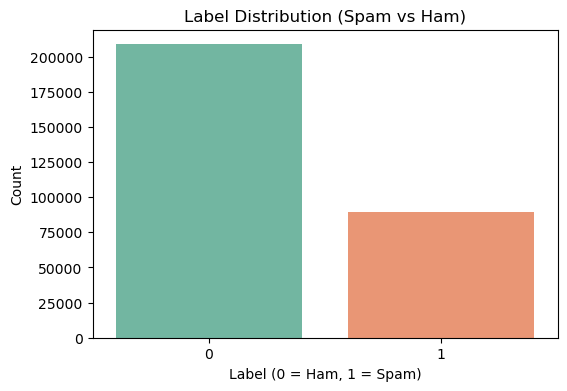

In [48]:
# ===============================================
# 2. LABEL DISTRIBUTION
# ===============================================

plt.figure(figsize=(6,4))
sns.countplot(x=df['label'], palette='Set2')
plt.title("Label Distribution (Spam vs Ham)")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.show()


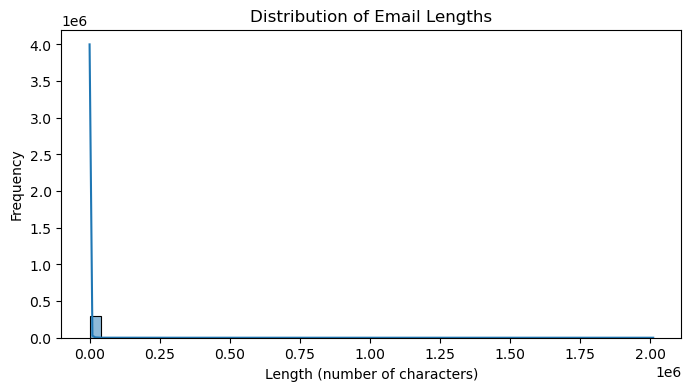

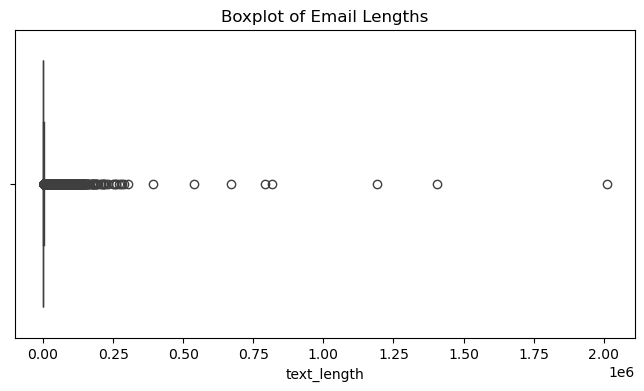

In [49]:
#====================================
# 3. TEXT LENGTH DISTRIBUTION
# ===============================================

df['text_length'] = df['message'].astype(str).apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution of Email Lengths")
plt.xlabel("Length (number of characters)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['text_length'])
plt.title("Boxplot of Email Lengths")
plt.show()

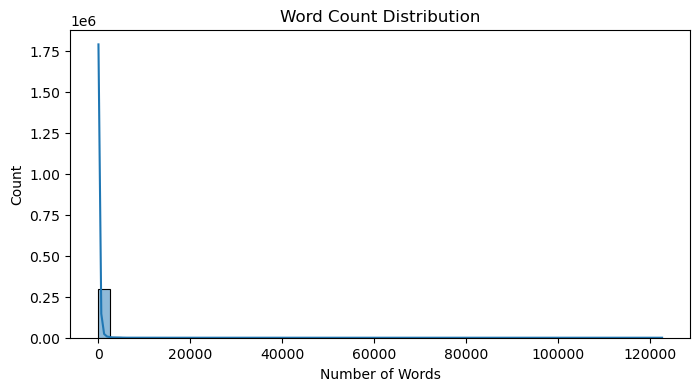

In [50]:
# ===============================================
# 4. WORD COUNT DISTRIBUTION
# ===============================================

df['word_count'] = df['message'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,4))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Number of Words")
plt.show()


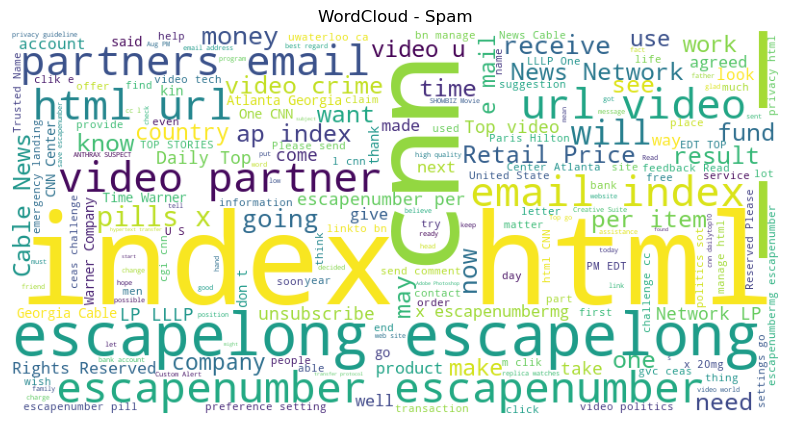

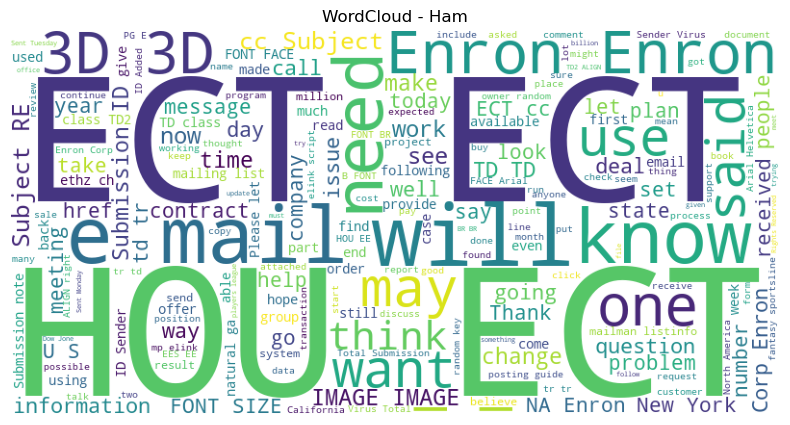

In [51]:
# ===============================================
# 5. WORDCLOUDS FOR SPAM & HAM
# ===============================================

spam_text = " ".join(df[df['label']==1]['message'].astype(str))
ham_text = " ".join(df[df['label']==0]['message'].astype(str))

plt.figure(figsize=(10,5))
wc_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.imshow(wc_spam)
plt.title("WordCloud - Spam")
plt.axis('off')
plt.show()

plt.figure(figsize=(10,5))
wc_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
plt.imshow(wc_ham)
plt.title("WordCloud - Ham")
plt.axis('off')
plt.show()

TRAIN -TEST SPLIT


In [52]:
from sklearn.model_selection import train_test_split

In [6]:
# First split: train vs temp
train_df, temp_df = train_test_split(
    df, 
    test_size=0.30, 
    random_state=42, 
    stratify=df['label']
)

# Second split: validation vs test
valid_df, test_df = train_test_split(
    temp_df, 
    test_size=0.50, 
    random_state=42, 
    stratify=temp_df['label']
)

print("Train size:", len(train_df))
print("Valid size:", len(valid_df))
print("Test size:", len(test_df))


Train size: 208716
Valid size: 44725
Test size: 44725


In [7]:
train_df

,message,label,text_length,word_count
108858,"\n\n\n\n\n\nThank you for your loan request, w...",1,415,62
32218,"Hello,\nMy laptop: acer aspire wlmi 5102\nMy d...",0,529,92
90163,Your performance with control and mastery will...,1,293,43
115407,"[""_The power of Email Marketing _ Email Market...",1,3544,624
79154,['HOT ALERT. .. Ca. mp. aign for: ADOVCurrent:...,1,288,50
...,...,...,...,...
48609,This message is a request to Enron to abandon ...,0,430,68
41896,Stop Smoking Resolution\nGo to http://openingr...,1,1683,170
261469,"Thanks, Tana! -MP ---------- From: Jones, Tana...",0,265,38
26951,This is a multi-part message in MIME format. -...,1,6983,757


In [8]:
valid_df

,message,label,text_length,word_count
94480,fyi ---------- hutchesons.net,0,29,3
81744,The report named: DPR - Concentration <http://...,0,331,22
181712,"on what? ---------- From: Maggi, Mike Sent: Th...",0,2475,428
48770,At file:///home/jelmer/bzr.samba/SAMBA_4_0/ --...,0,13030,1331
153874,"On Wed, Mar 19, 2008 at 2:57 AM, Nick Coghlan ...",0,801,100
...,...,...,...,...
283134,Jonathan's response and my draft response for ...,0,1610,264
109775,"| **< = font face=3D""Verdana"" size=3D""3"" color...",1,1428,183
19567,"Hey Cooper, Well, I don't know if you remember...",0,1363,266
242183,ADMINISTRATIVE 2001 EHS Performance Targets - ...,0,22977,3480


In [9]:
test_df

,message,label,text_length,word_count
132008,\nThese original watches sell in stores for th...,1,218,30
220579,If you have do the solemn major domestic polit...,1,2639,422
30837,On Saturday 09 February 2008 12:44:08 pm Rods ...,0,404,67
105194,FYI ---------------------- Mark - ECT Legal T...,0,839,112
81496,The following is an update of the last two mee...,0,2245,375
...,...,...,...,...
275071,NTELOS Holdings\nCorp. \n\nStock Quote Notifi...,0,776,113
205989,Monmouth College recently received a gift of $...,0,1407,231
252601,Here is my DSL form.,0,20,5
103708,"\nSize DOES matter, and unfortunately, many tr...",1,228,33


In [57]:
print("\nLabel distribution:")
print("Train:\n", train_df['label'].value_counts(normalize=True))
print("Validation:\n", valid_df['label'].value_counts(normalize=True))
print("Test:\n", test_df['label'].value_counts(normalize=True))


Label distribution:
Train:
 label
0    0.699999
1    0.300001
Name: proportion, dtype: float64
Validation:
 label
0    0.699989
1    0.300011
Name: proportion, dtype: float64
Test:
 label
0    0.700011
1    0.299989
Name: proportion, dtype: float64


In [58]:
from collections import Counter
import re

all_text = " ".join(train_df["message"].astype(str))

# simple word split
words = re.findall(r"\w+", all_text.lower())

unique_words = set(words)
vocab_size = len(unique_words)

print("Unique tokens:", vocab_size)


Unique tokens: 682713


In [ ]:
vocab_size = min(len(unique_words), 20000)

Total tokens (all occurrences): 52,524,246
Unique token types: 682,713

Top 30 tokens:
         the : 1,829,258
          to : 1,275,330
         and : 893,128
          of : 845,267
           a : 762,891
          in : 610,384
         for : 488,987
         you : 481,515
           i : 434,289
          is : 428,295
         com : 396,878
          on : 367,380
        that : 360,223
        this : 332,757
           s : 332,220
        http : 274,462
          be : 273,542
          it : 272,256
        with : 270,244
        from : 240,163
          as : 238,592
       enron : 234,911
        your : 233,656
        have : 223,317
          20 : 221,453
          we : 221,156
         are : 217,185
          at : 215,558
        will : 212,977
          or : 210,160


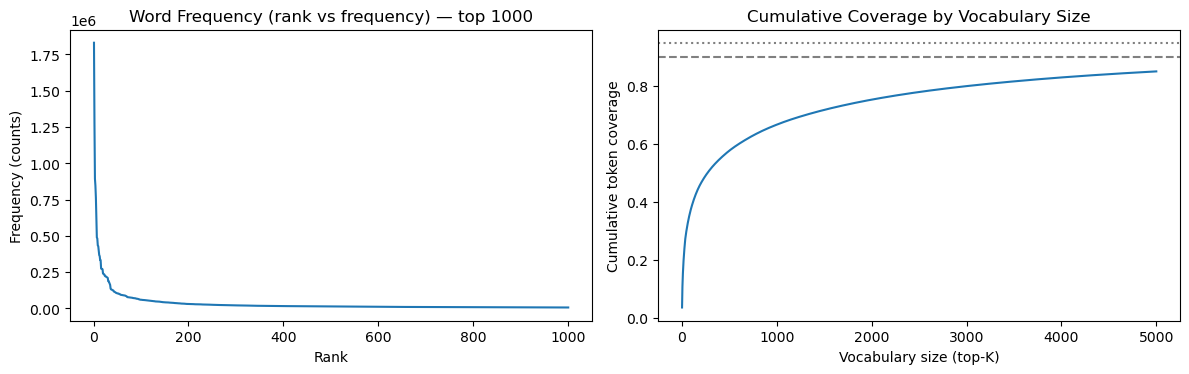

Top-9,466 tokens cover 90% of all token occurrences.
Top-27,064 tokens cover 95% of all token occurrences.
Top-106,994 tokens cover 98% of all token occurrences.

Recommended choices (research-oriented):
 - top-9,466  -> ~90% coverage (fast, smaller model)
 - top-27,064  -> ~95% coverage (balanced)
 - top-106,994  -> ~98% coverage (larger vocab)

Example rare tokens (last 50 types): ['ujescapenumber', 'raymone', '8167', 'llaji', '1951a', '1955a', '1969a', '1969b', '1972a', '1972b', '1972c', '1972e', '2963a', '2963b', '2964a', '2965a', '2965b', '2966a', '2966b', '2966c']


In [ ]:
# Step 1: Vocabulary analysis   
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


texts = train_df['message'].astype(str).tolist()

# 1) simple tokenization function (word-level, lowercased)
def simple_tokenize(text):
    # keeps alphanumerics as tokens (numbers preserved), splits on other chars
    return re.findall(r"\w+", text.lower())

# 2) build frequency counter
counter = Counter()
for t in texts:
    counter.update(simple_tokenize(t))

# 3) basic stats
total_unique = len(counter)
total_tokens = sum(counter.values())

print(f"Total tokens (all occurrences): {total_tokens:,}")
print(f"Unique token types: {total_unique:,}")

# 4) most common tokens (top 30)
print("\nTop 30 tokens:")
for word, freq in counter.most_common(30):
    print(f"{word:>12s} : {freq:,}")

# # 5) prepare sorted frequency list and cumulative coverage
# sorted_freqs = np.array([f for _, f in counter.most_common()])
# ranks = np.arange(1, len(sorted_freqs) + 1)
# cum_counts = np.cumsum(sorted_freqs)
# cum_coverage = cum_counts / total_tokens

# # 6) plot frequency curve (Zipf-like) and cumulative coverage
# plt.figure(figsize=(12,4))
# plt.subplot(1,2,1)
# plt.plot(ranks[:1000], sorted_freqs[:1000])
# plt.title("Word Frequency (rank vs frequency) — top 1000")
# plt.xlabel("Rank")
# plt.ylabel("Frequency (counts)")

# plt.subplot(1,2,2)
# plt.plot(ranks[:5000], cum_coverage[:5000])
# plt.axhline(0.90, color='gray', linestyle='--')  # 90% coverage line
# plt.axhline(0.95, color='gray', linestyle=':')
# plt.title("Cumulative Coverage by Vocabulary Size")
# plt.xlabel("Vocabulary size (top-K)")
# plt.ylabel("Cumulative token coverage")
# plt.tight_layout()
# plt.show()

# 7) find K for common coverage thresholds (90%, 95%, 98%)
def find_k_for_coverage(coverage=0.95):
    idx = np.searchsorted(cum_coverage, coverage)
    return idx + 1  # ranks are 1-indexed

for cov in (0.90, 0.95, 0.98):
    k = find_k_for_coverage(cov)
    print(f"Top-{k:,} tokens cover {int(cov*100)}% of all token occurrences.")

# 8) print recommended vocab sizes
k90 = find_k_for_coverage(0.90)
k95 = find_k_for_coverage(0.95)
k98 = find_k_for_coverage(0.98)
print("\nRecommended choices (research-oriented):")
print(f" - top-{k90:,}  -> ~90% coverage (fast, smaller model)")
print(f" - top-{k95:,}  -> ~95% coverage (balanced)")
print(f" - top-{k98:,}  -> ~98% coverage (larger vocab)")

# 9) optional: list some rare tokens (tail)
tail_sample = [w for w, f in counter.most_common()[-50:]]
print("\nExample rare tokens (last 50 types):", tail_sample[:20])


In [16]:
vocab_size = 20000

Total messages: 208716
Max length: 190469
Average length: 251.65414247110905
Median length: 112.0
90th percentile: 539.0
95th percentile: 732.0
98th percentile: 1374.0
99th percentile: 2239.0


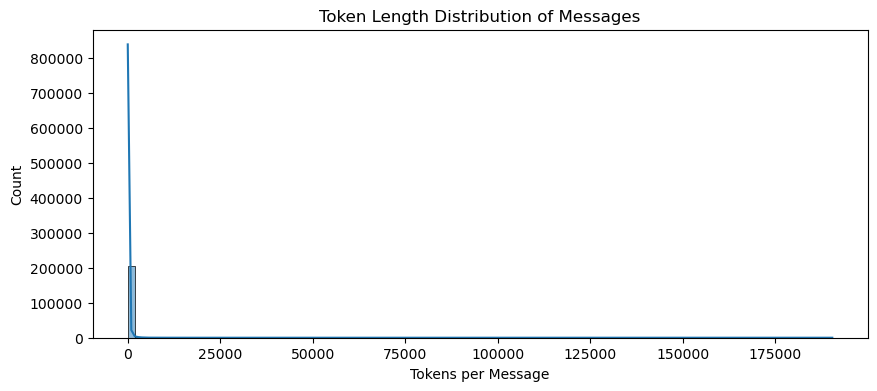

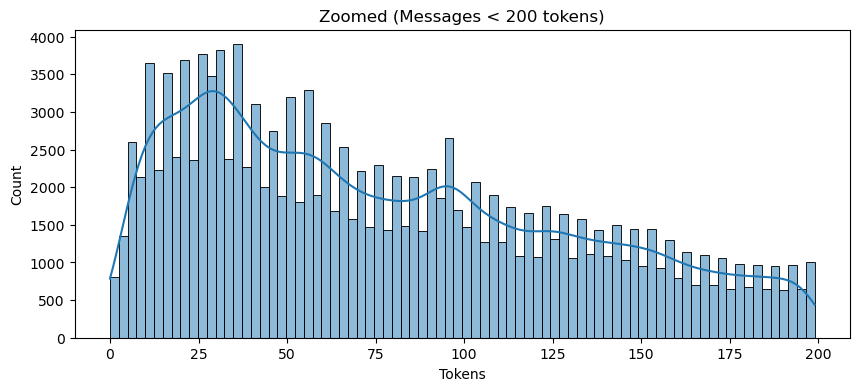

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Simple tokenizer for measuring length (not the TF tokenizer)
def simple_tokenize(text):
    return re.findall(r"\w+", text.lower())

# Compute lengths of each message
lengths = train_df['message'].astype(str).apply(lambda x: len(simple_tokenize(x))).values

print("Total messages:", len(lengths))
print("Max length:", lengths.max())
print("Average length:", lengths.mean())
print("Median length:", np.median(lengths))

# Percentile cutoffs
for p in [90, 95, 98, 99]:
    print(f"{p}th percentile:", np.percentile(lengths, p))

# Plot distribution
plt.figure(figsize=(10,4))
sns.histplot(lengths, bins=100, kde=True)
plt.title("Token Length Distribution of Messages")
plt.xlabel("Tokens per Message")
plt.ylabel("Count")
plt.show()

# Zoomed-in plot (to see the dense region)
plt.figure(figsize=(10,4))
sns.histplot(lengths[lengths < 200], bins=80, kde=True)
plt.title("Zoomed (Messages < 200 tokens)")
plt.xlabel("Tokens")
plt.ylabel("Count")
plt.show()


In [15]:
max_len = int(300)

In [10]:
train_df['message'] = train_df['message'].astype(str)
valid_df['message'] = valid_df['message'].astype(str)
test_df['message']  = test_df['message'].astype(str)


In [11]:
import pickle

with open("vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)


In [14]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
import numpy as np

In [64]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
import numpy as np

VOCAB_SIZE = vocab_size     # your value
MAX_LEN = max_len  # your value

# --- Prepare TextVectorization layer ---
vectorizer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="int",
    output_sequence_length=MAX_LEN,
)

# Fit ONLY on training text
vectorizer.adapt(train_df["message"].values)

print("Tokenizer vocabulary size:", len(vectorizer.get_vocabulary()))


Tokenizer vocabulary size: 20000


In [12]:
# Convert text → sequence integers
X_train = vectorizer(train_df["message"].values)
X_valid = vectorizer(valid_df["message"].values)
X_test  = vectorizer(test_df["message"].values)

# Convert labels
y_train = train_df["label"].values
y_valid = valid_df["label"].values
y_test  = test_df["label"].values

print("Example encoded text:", X_train[0][:20])


Example encoded text: tf.Tensor(
[ 257    9    8   19 1601  308   62   25 7297  843   19 4887  799   38
   72 1842  155  239   26   28], shape=(20,), dtype=int64)


In [66]:
X_train

<tf.Tensor: shape=(208716, 300), dtype=int64, numpy=
array([[ 257,    9,    8, ...,    0,    0,    0],
       [1187,   40, 4397, ...,    0,    0,    0],
       [  19,  854,   16, ...,    0,    0,    0],
       ...,
       [  86, 1204, 5598, ...,    0,    0,    0],
       [  14,   10,    6, ...,  549,    3,  186],
       [7855, 3288, 3113, ...,    0,    0,    0]])>

In [67]:
import numpy as np

VOCAB_SIZE = vocab_size   # <-- set yours here

def emb_dim_sqrt(v):
    return int(np.sqrt(v))

def emb_dim_log(v):
    return int(6 * np.log2(v))

def emb_dim_fourth_root(v):
    return int(3 * (v ** 0.25))

def emb_dim_industry(v):
    # choose the nearest of [50, 100, 200, 300]
    base = np.array([50, 100, 200, 300])
    idx = np.argmin(np.abs(base - np.sqrt(v)))
    return int(base[idx])

print("Embedding dimension suggestions:")
print("--------------------------------")
print("√V rule:", emb_dim_sqrt(VOCAB_SIZE))
print("6·log2(V) rule:", emb_dim_log(VOCAB_SIZE))
print("3·V^1/4 rule:", emb_dim_fourth_root(VOCAB_SIZE))
print("Industry (nearest):", emb_dim_industry(VOCAB_SIZE))


Embedding dimension suggestions:
--------------------------------
√V rule: 141
6·log2(V) rule: 85
3·V^1/4 rule: 35
Industry (nearest): 100


In [18]:
VOCAB_SIZE = vocab_size

In [19]:
EMBED_DIM = 150

embedding_layer = tf.keras.layers.Embedding(
    input_dim=VOCAB_SIZE,
    output_dim=EMBED_DIM,
    mask_zero=True,
    name="embedding_layer"
)


In [20]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(146101), np.int64(1): np.int64(62615)}


In [45]:
FILTERS = 128                      # number of filters in each CNN branch
KERNEL_SIZES = [3, 5, 7]          # parallel CNN branches
LSTM_UNITS = 128                  # BiLSTM hidden units
FEATURE_DIM = 128                 # Dense feature layer (before XGB if needed)

print("Hyperparameters loaded.")

Hyperparameters loaded.


Building a CNN  MODEL

In [70]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.array([0, 1])
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)

class_weights = {i: w for i, w in enumerate(class_weights)}
class_weights


{0: np.float64(0.7142866920828742), 1: np.float64(1.6666613431286432)}

In [76]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def build_cnn_model():
    inputs = layers.Input(shape=(MAX_LEN,), dtype=tf.int32)

    x = layers.Embedding(
        input_dim=VOCAB_SIZE,
        output_dim=EMBED_DIM,
        mask_zero=True
    )(inputs)

    x = layers.Conv1D(128, 5, activation="relu", padding="same")(x)
    x = layers.MaxPooling1D(2)(x)

    x = layers.Conv1D(128, 5, activation="relu", padding="same")(x)
    x = layers.MaxPooling1D(2)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.4)(x)

    outputs = layers.Dense(1, activation="sigmoid")(x)

    return Model(inputs, outputs)


In [77]:
model_cnn = build_cnn_model()

model_cnn.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

model_cnn.summary()


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\layer.py:970: UserWarning: Layer 'conv1d_2' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 300, 150)       │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 300, 128)       │        96,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 150, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 150, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,228,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,407,233 (16.81 MB)

 Trainable params: 4,407,233 (16.81 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
history = model_cnn.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    epochs=5,
    batch_size=256,
    class_weight=class_weights
)


Epoch 1/5
816/816 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9809 - auc: 0.9976 - loss: 0.0536

c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\layer.py:970: UserWarning: Layer 'conv1d_2' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


816/816 ━━━━━━━━━━━━━━━━━━━━ 244s 300ms/step - accuracy: 0.9828 - auc: 0.9979 - loss: 0.0490 - val_accuracy: 0.9831 - val_auc: 0.9986 - val_loss: 0.0468
Epoch 2/5
816/816 ━━━━━━━━━━━━━━━━━━━━ 251s 308ms/step - accuracy: 0.9922 - auc: 0.9994 - loss: 0.0223 - val_accuracy: 0.9861 - val_auc: 0.9980 - val_loss: 0.0424
Epoch 3/5
816/816 ━━━━━━━━━━━━━━━━━━━━ 237s 290ms/step - accuracy: 0.9962 - auc: 0.9998 - loss: 0.0117 - val_accuracy: 0.9848 - val_auc: 0.9964 - val_loss: 0.0589
Epoch 4/5
816/816 ━━━━━━━━━━━━━━━━━━━━ 215s 263ms/step - accuracy: 0.9970 - auc: 0.9999 - loss: 0.0088 - val_accuracy: 0.9868 - val_auc: 0.9957 - val_loss: 0.0568
Epoch 5/5
816/816 ━━━━━━━━━━━━━━━━━━━━ 210s 257ms/step - accuracy: 0.9974 - auc: 0.9999 - loss: 0.0079 - val_accuracy: 0.9860 - val_auc: 0.9956 - val_loss: 0.0648


In [82]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [170]:
# Predict
y_pred_proba_cnn = model_cnn.predict(X_test)
y_pred_cnn = (y_pred_proba_cnn > 0.5).astype(int)

# Metrics
acc_c  = accuracy_score(y_test, y_pred_cnn)
prec_c = precision_score(y_test, y_pred_cnn)
rec_c  = recall_score(y_test, y_pred_cnn)
f1_c   = f1_score(y_test, y_pred_cnn)

print("\n===== TEST RESULTS =====")
print(f"Accuracy  : {acc_c:.4f}")
print(f"Precision : {prec_c:.4f}")
print(f"Recall    : {rec_c:.4f}")
print(f"F1-score  : {f1_c:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_cnn, digits=4))


1398/1398 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step

===== TEST RESULTS =====
Accuracy  : 0.9864
Precision : 0.9712
Recall    : 0.9838
F1-score  : 0.9775

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9930    0.9875    0.9902     31308
           1     0.9712    0.9838    0.9775     13417

    accuracy                         0.9864     44725
   macro avg     0.9821    0.9856    0.9838     44725
weighted avg     0.9865    0.9864    0.9864     44725



In [117]:
%matplotlib inline


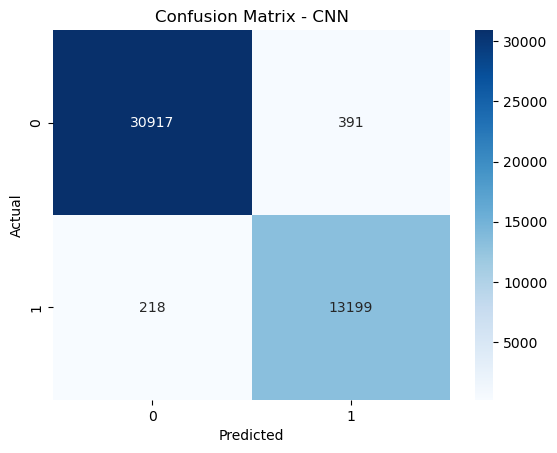

In [174]:

cm_cnn = confusion_matrix(y_test, y_pred_cnn)

sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN")
plt.show()


In [172]:
cm_cnn

array([[30917,   391],
       [  218, 13199]])

In [87]:
model_cnn.save("cnn_spam_model.h5")

# Save vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


In [111]:
model = tf.keras.models.load_model("cnn_spam_model.h5", compile=False)
model.save("cnn.keras")


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\layer.py:970: UserWarning: Layer 'conv1d_2' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [87]:
model1 = tf.keras.models.load_model("cnn_spam_model.h5")

with open("vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\layer.py:970: UserWarning: Layer 'conv1d_2' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [92]:
def predict_email1(email_text):
    # email_text → integer tokens
    seq = vectorizer([email_text])  # shape: (1, MAX_LEN)

    pred_proba = model_cb.predict(seq)[0][0]
    pred = 1 if pred_proba > 0.5 else 0

    print("Spam Probability:", round(pred_proba, 4))
    
    if pred == 1:
        print("Prediction: **SPAM**")
    else:
        print("Prediction: **HAM**")

    return pred


In [93]:
predict_email1("""You have won a free reward . PLease click the link below .""")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
Spam Probability: 0.1068
Prediction: **HAM**


0

CNN + LSTM


In [124]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def build_cnn_lstm(MAX_LEN=300, VOCAB_SIZE=20000, EMBED_DIM=150):
    inputs = layers.Input(shape=(MAX_LEN,), dtype=tf.int32)

    x = layers.Embedding(
        input_dim=VOCAB_SIZE,
        output_dim=EMBED_DIM,
        mask_zero=True
    )(inputs)

    # CNN feature extractor
    x = layers.Conv1D(128, 5, activation="relu", padding="same")(x)
    x = layers.MaxPooling1D(2)(x)

    # LSTM Layer
    x = layers.LSTM(128, return_sequences=False)(x)

    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.4)(x)

    outputs = layers.Dense(1, activation="sigmoid")(x)

    return Model(inputs, outputs)


In [126]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

model_cnn_lstm = build_cnn_lstm(MAX_LEN, VOCAB_SIZE, EMBED_DIM)

model_cnn_lstm.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

history = model_cnn_lstm.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=3,          # Keep fast (you can increase later)
    batch_size=256,
    class_weights = class_weights
)

print("\n=== Evaluation on Test Set ===")
test_loss, test_acc, test_auc = model_cnn_lstm.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Predictions
y_pred_prob = model_cnn_lstm.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


Epoch 1/3


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\layer.py:970: UserWarning: Layer 'conv1d_25' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


816/816 ━━━━━━━━━━━━━━━━━━━━ 604s 680ms/step - accuracy: 0.8627 - auc: 0.9168 - loss: 0.3104 - val_accuracy: 0.9740 - val_auc: 0.9960 - val_loss: 0.0670
Epoch 2/3
816/816 ━━━━━━━━━━━━━━━━━━━━ 523s 641ms/step - accuracy: 0.9832 - auc: 0.9976 - loss: 0.0479 - val_accuracy: 0.9823 - val_auc: 0.9969 - val_loss: 0.0504
Epoch 3/3
816/816 ━━━━━━━━━━━━━━━━━━━━ 549s 673ms/step - accuracy: 0.9907 - auc: 0.9988 - loss: 0.0283 - val_accuracy: 0.9836 - val_auc: 0.9966 - val_loss: 0.0507

=== Evaluation on Test Set ===
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.9831 - auc: 0.9964 - loss: 0.0535
Test Loss: 0.0535
Test Accuracy: 0.9831
Test AUC: 0.9964
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step


In [ ]:


# Metrics
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print("\n===== TEST RESULTS =====")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-score  : {f1:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))


===== TEST RESULTS =====
Accuracy  : 0.9831
Precision : 0.9702
Recall    : 0.9734
F1-score  : 0.9718

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9886    0.9872    0.9879     31308
           1     0.9702    0.9734    0.9718     13417

    accuracy                         0.9831     44725
   macro avg     0.9794    0.9803    0.9798     44725
weighted avg     0.9831    0.9831    0.9831     44725



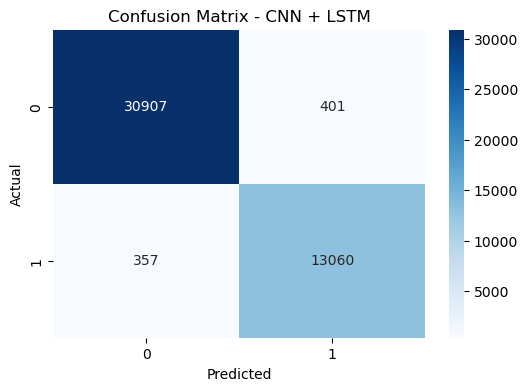

In [128]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN + LSTM")
plt.show()


In [129]:
model_cnn_lstm.save("cnn_lstm_spam_model.h5")
print("Model saved as cnn_lstm_spam_model.h5")


Model saved as cnn_lstm_spam_model.h5


In [133]:
def predict_email_cl(text, vectorizer, model):
    seq = vectorizer([text])  # Convert to int sequence
    prob = model.predict(seq)[0][0]
    label = "SPAM" if prob > 0.5 else "HAM"

    
    print(f"Predicted Class: {label}")
    print(f"Spam Probability: {prob:.4f}")

    return label, prob


In [134]:
email = """Dear Customer,

We detected unusual activity on your online banking profile and, for your safety, your access has been temporarily limited.
This restriction will remain in place until your identity is verified.

To restore full access, please complete the verification form using the secure link below:

Verification Portal:
https://secure-update-alerts.com/verify/session=7982139

If you do not complete this verification within 24 hours, your account may be permanently disabled for security reasons.

This is an automated message. Please do not reply.

Thank you for choosing OnlineBank™.
Security Operations Team
© 2025 OnlineBank Digital Services"""
predict_email_cl(email, vectorizer, model_cnn_lstm)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Predicted Class: SPAM
Spam Probability: 0.8834


('SPAM', np.float32(0.8834437))

LSTM 

In [140]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def build_lstm(MAX_LEN=300, VOCAB_SIZE=20000, EMBED_DIM=150):

    inputs = layers.Input(shape=(MAX_LEN,), dtype=tf.int32)

    x = layers.Embedding(
        input_dim=VOCAB_SIZE,
        output_dim=EMBED_DIM,
        mask_zero=True
    )(inputs)

    x = layers.LSTM(128, return_sequences=False)(x)

    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.4)(x)

    outputs = layers.Dense(1, activation="sigmoid")(x)

    return Model(inputs, outputs)


In [142]:
model_lstm = build_lstm(MAX_LEN, VOCAB_SIZE, EMBED_DIM)
# or model_bilstm = build_bilstm(MAX_LEN, VOCAB_SIZE, EMBED_DIM)

model_lstm.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

history = model_lstm.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=3,
    batch_size=256
)


Epoch 1/3
816/816 ━━━━━━━━━━━━━━━━━━━━ 1013s 1s/step - accuracy: 0.9450 - auc: 0.9802 - loss: 0.1554 - val_accuracy: 0.9725 - val_auc: 0.9940 - val_loss: 0.0870
Epoch 2/3
816/816 ━━━━━━━━━━━━━━━━━━━━ 1783s 2s/step - accuracy: 0.9756 - auc: 0.9944 - loss: 0.0739 - val_accuracy: 0.9781 - val_auc: 0.9956 - val_loss: 0.0634
Epoch 3/3
816/816 ━━━━━━━━━━━━━━━━━━━━ 1189s 1s/step - accuracy: 0.9808 - auc: 0.9967 - loss: 0.0561 - val_accuracy: 0.9789 - val_auc: 0.9962 - val_loss: 0.0608


In [152]:
test_loss, test_acc, test_auc = model_lstm.evaluate(X_test, y_test)
print(test_loss, test_acc, test_auc)

y_pred_prob_lstm = model_lstm.predict(X_test)
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int)


1398/1398 ━━━━━━━━━━━━━━━━━━━━ 92s 66ms/step - accuracy: 0.9784 - auc: 0.9963 - loss: 0.0610
0.06098048761487007 0.9783565998077393 0.9963295459747314
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 91s 65ms/step


In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lstm))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     31308
           1       0.96      0.97      0.96     13417

    accuracy                           0.98     44725
   macro avg       0.97      0.98      0.97     44725
weighted avg       0.98      0.98      0.98     44725



In [168]:


# Metrics
acc1  = accuracy_score(y_test, y_pred_lstm)
prec1 = precision_score(y_test, y_pred_lstm)
rec1  = recall_score(y_test, y_pred_lstm)
f11   = f1_score(y_test, y_pred_lstm)

print("\n===== TEST RESULTS =====")
print(f"Accuracy  : {acc1:.4f}")
print(f"Precision : {prec1:.4f}")
print(f"Recall    : {rec1:.4f}")
print(f"F1-score  : {f11:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_lstm, digits=4))


===== TEST RESULTS =====
Accuracy  : 0.9784
Precision : 0.9552
Recall    : 0.9735
F1-score  : 0.9643

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9885    0.9805    0.9845     31308
           1     0.9552    0.9735    0.9643     13417

    accuracy                         0.9784     44725
   macro avg     0.9719    0.9770    0.9744     44725
weighted avg     0.9785    0.9784    0.9784     44725



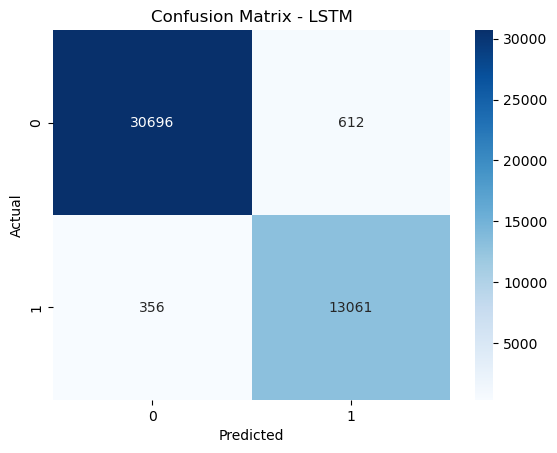

In [167]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lstm = confusion_matrix(y_test, y_pred_lstm)

sns.heatmap(cm_lstm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM")
plt.show()


In [175]:
cm_lstm

array([[30696,   612],
       [  356, 13061]])

In [147]:
model_lstm.save("lstm_spam_model.h5")


In [148]:
def predict_email_lstm(text, vectorizer, model):
    seq = vectorizer([text])
    prob = model_lstm.predict(seq)[0][0]
    label = "SPAM" if prob > 0.5 else "HAM"
    print(f"Prediction: {label} (prob={prob:.4f})")
    return label, prob


In [149]:
email = """Dear Customer,

We detected unusual activity on your online banking profile and, for your safety, your access has been temporarily limited.
This restriction will remain in place until your identity is verified.

To restore full access, please complete the verification form using the secure link below:

Verification Portal:
https://secure-update-alerts.com/verify/session=7982139

If you do not complete this verification within 24 hours, your account may be permanently disabled for security reasons.

This is an automated message. Please do not reply.

Thank you for choosing OnlineBank™.
Security Operations Team
© 2025 OnlineBank Digital Services"""
predict_email_lstm(email, vectorizer, model_cnn_lstm)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction: SPAM (prob=0.9612)


('SPAM', np.float32(0.9612373))

BILSTM


In [150]:
def build_bilstm(MAX_LEN=300, VOCAB_SIZE=20000, EMBED_DIM=150):
    
    inputs = layers.Input(shape=(MAX_LEN,), dtype=tf.int32)

    x = layers.Embedding(
        input_dim=VOCAB_SIZE,
        output_dim=EMBED_DIM,
        mask_zero=True
    )(inputs)

    x = layers.Bidirectional(
        layers.LSTM(128, return_sequences=False)
    )(x)

    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.4)(x)

    outputs = layers.Dense(1, activation="sigmoid")(x)

    return Model(inputs, outputs)


In [156]:

model_bilstm = build_bilstm(MAX_LEN, VOCAB_SIZE, EMBED_DIM)

model_bilstm.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

history = model_bilstm.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=3,
    batch_size=256
)


Epoch 1/3
816/816 ━━━━━━━━━━━━━━━━━━━━ 3821s 5s/step - accuracy: 0.9681 - auc: 0.9947 - loss: 0.0813 - val_accuracy: 0.9815 - val_auc: 0.9981 - val_loss: 0.0526
Epoch 2/3
816/816 ━━━━━━━━━━━━━━━━━━━━ 3006s 4s/step - accuracy: 0.9876 - auc: 0.9988 - loss: 0.0334 - val_accuracy: 0.9841 - val_auc: 0.9976 - val_loss: 0.0460
Epoch 3/3
816/816 ━━━━━━━━━━━━━━━━━━━━ 3402s 4s/step - accuracy: 0.9921 - auc: 0.9994 - loss: 0.0207 - val_accuracy: 0.9821 - val_auc: 0.9950 - val_loss: 0.0598


In [157]:
test_loss, test_acc, test_auc = model_lstm.evaluate(X_test, y_test)
print(test_loss, test_acc, test_auc)

y_pred_prob_bilstm = model_bilstm.predict(X_test)
y_pred_bilstm = (y_pred_prob_bilstm > 0.5).astype(int)


1398/1398 ━━━━━━━━━━━━━━━━━━━━ 93s 66ms/step - accuracy: 0.9784 - auc: 0.9963 - loss: 0.0610
0.06098048761487007 0.9783565998077393 0.9963295459747314
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 121s 86ms/step


In [ ]:

# Metrics

acc  = accuracy_score(y_test, y_pred_bilstm)
prec = precision_score(y_test, y_pred_bilstm)
rec  = recall_score(y_test, y_pred_bilstm)
f1   = f1_score(y_test, y_pred_bilstm)

print("\n===== TEST RESULTS =====")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-score  : {f1:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_bilstm, digits=4))


===== TEST RESULTS =====
Accuracy  : 0.9804
Precision : 0.9748
Recall    : 0.9595
F1-score  : 0.9671

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9828    0.9894    0.9861     31308
           1     0.9748    0.9595    0.9671     13417

    accuracy                         0.9804     44725
   macro avg     0.9788    0.9744    0.9766     44725
weighted avg     0.9804    0.9804    0.9804     44725



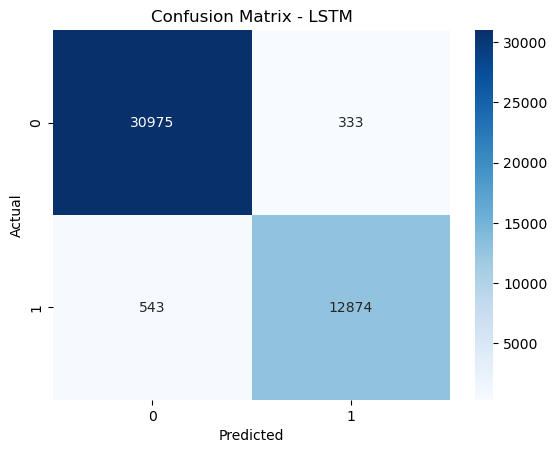

In [166]:

cm_bilstm = confusion_matrix(y_test, y_pred_bilstm)

sns.heatmap(cm_bilstm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM")
plt.show()


In [165]:
cm_bilstm

array([[30975,   333],
       [  543, 12874]])

In [161]:
model_bilstm.save("bilstm_spam_model.h5")


In [162]:
def predict_email_bilstm(text, vectorizer, model):
    seq = vectorizer([text])
    prob = model_bilstm.predict(seq)[0][0]
    label = "SPAM" if prob > 0.5 else "HAM"
    print(f"Prediction: {label} (prob={prob:.4f})")
    return label, prob


CNN + BILSTM 

In [21]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
class_weights_vals = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)

class_weights = {cls: weight for cls, weight in zip(classes, class_weights_vals)}
print(class_weights)


{np.int64(0): np.float64(0.7142866920828742), np.int64(1): np.float64(1.6666613431286432)}


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def build_hybrid_cnn_bilstm(MAX_LEN=300, VOCAB_SIZE=20000, EMBED_DIM=150):

    inp = layers.Input(shape=(MAX_LEN,), dtype=tf.int32)

    # --- Embedding ---
    x = layers.Embedding(
        input_dim=VOCAB_SIZE,
        output_dim=EMBED_DIM,
        mask_zero=False
    )(inp)

    x = layers.SpatialDropout1D(0.2)(x)

    # === Branch 1: kernel size 3 ===
    b1 = layers.Conv1D(128, 3, padding="same")(x)
    b1 = layers.LayerNormalization()(b1)
    b1 = layers.Activation("relu")(b1)

    # === Branch 2: kernel size 5 ===
    b2 = layers.Conv1D(128, 5, padding="same")(x)
    b2 = layers.LayerNormalization()(b2)
    b2 = layers.Activation("relu")(b2)

    # === Branch 3: kernel size 7 ===
    b3 = layers.Conv1D(128, 7, padding="same")(x)
    b3 = layers.LayerNormalization()(b3)
    b3 = layers.Activation("relu")(b3)

    # === Concatenate features ===
    merged = layers.Concatenate()([b1, b2, b3])   # (N, 300, 384)

    # ⭐ NEW: Pooling to reduce sequence length for faster LSTM
    pooled = layers.MaxPooling1D(pool_size=2, strides=2, padding="same")(merged)
    # Now sequence length: 300 -> 150 → LSTM becomes ~2x faster

    # === Fusion convolution ===
    fused = layers.Conv1D(128, 1, padding="same")(pooled)
    fused = layers.LayerNormalization()(fused)
    fused = layers.Activation("relu")(fused)

    # === BiLSTM block ===
    lstm = layers.Bidirectional(
        layers.LSTM(128, return_sequences=False)
    )(fused)

    # === Dense head ===
    dense = layers.Dense(128, activation="relu")(lstm)
    dense = layers.Dropout(0.4)(dense)

    out = layers.Dense(1, activation="sigmoid")(dense)

    model = Model(inp, out)
    return model


In [23]:
model_cb = build_hybrid_cnn_bilstm(
    MAX_LEN=300,
    VOCAB_SIZE=20000,
    EMBED_DIM=150
)

model_cb.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(1e-3),
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

model_cb.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 300, 150)  │  3,000,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d   │ (None, 300, 150)  │          0 │ embedding[0][0]   │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 300, 128)  │     57,728 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 300, 128)  │     96,128 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 300, 128)  │    134,528 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 300, 128)  │        256 │ conv1d[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 300, 128)  │        256 │ conv1d_1[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 300, 128)  │        256 │ conv1d_2[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 300, 128)  │          0 │ layer_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 300, 128)  │          0 │ layer_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 300, 128)  │          0 │ layer_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 300, 384)  │          0 │ activation[0][0], │
│ (Concatenate)       │                   │            │ activation_1[0][… │
│                     │                   │            │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 150, 384)  │          0 │ concatenate[0][0] │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 150, 128)  │     49,280 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 150, 128)  │        256 │ conv1d_3[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 150, 128)  │          0 │ layer_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 256)       │    263,168 │ activation_3[0][

 Total params: 3,634,881 (13.87 MB)

 Trainable params: 3,634,881 (13.87 MB)

 Non-trainable params: 0 (0.00 B)

In [253]:
model_hybrid_2 =  build_hybrid_cnn_bilstm(
    MAX_LEN=300,
    VOCAB_SIZE=20000,
    EMBED_DIM=150
)

model_hybrid_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(1e-3),
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

model_hybrid_2.summary()


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\layer.py:970: UserWarning: Layer 'conv1d_62' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\layer.py:970: UserWarning: Layer 'conv1d_63' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\layer.py:970: UserWarning: Layer 'conv1d_64' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17      │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_16        │ (None, 300, 150)  │  3,000,000 │ input_layer_17[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_… │ (None, 300, 150)  │          0 │ embedding_16[0][… │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_62 (Conv1D)  │ (None, 300, 128)  │     57,728 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_63 (Conv1D)  │ (None, 300, 128)  │     96,128 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_64 (Conv1D)  │ (None, 300, 128)  │    134,528 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 300, 128)  │        256 │ conv1d_62[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 300, 128)  │        256 │ conv1d_63[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 300, 128)  │        256 │ conv1d_64[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_51       │ (None, 300, 128)  │          0 │ layer_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_52       │ (None, 300, 128)  │          0 │ layer_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_53       │ (None, 300, 128)  │          0 │ layer_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_14      │ (None, 300, 384)  │          0 │ activation_51[0]… │
│ (Concatenate)       │                   │            │ activation_52[0]… │
│                     │                   │            │ activation_53[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_65 (Conv1D)  │ (None, 300, 128)  │     49,280 │ concatenate_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 300, 128)  │        256 │ conv1d_65[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_54       │ (None, 300, 128)  │          0 │ layer_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_16    │ (None, 256)       │    263,168 │ activation_54[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_44 (Dense)    │ (None, 128)       │     32,896 │ bidirectional_16

 Total params: 3,634,881 (13.87 MB)

 Trainable params: 3,634,881 (13.87 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history_cb = model_cb.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    class_weight=class_weights,
    epochs=5,
    batch_size=256
)

Epoch 1/5
816/816 ━━━━━━━━━━━━━━━━━━━━ 1696s 2s/step - accuracy: 0.9649 - auc: 0.9945 - loss: 0.0902 - val_accuracy: 0.9818 - val_auc: 0.9979 - val_loss: 0.0501
Epoch 2/5
816/816 ━━━━━━━━━━━━━━━━━━━━ 23297s 29s/step - accuracy: 0.9887 - auc: 0.9989 - loss: 0.0322 - val_accuracy: 0.9864 - val_auc: 0.9983 - val_loss: 0.0392
Epoch 3/5
816/816 ━━━━━━━━━━━━━━━━━━━━ 2851s 3s/step - accuracy: 0.9933 - auc: 0.9994 - loss: 0.0194 - val_accuracy: 0.9866 - val_auc: 0.9972 - val_loss: 0.0464
Epoch 4/5
816/816 ━━━━━━━━━━━━━━━━━━━━ 1376s 2s/step - accuracy: 0.9952 - auc: 0.9997 - loss: 0.0142 - val_accuracy: 0.9816 - val_auc: 0.9957 - val_loss: 0.0739
Epoch 5/5
816/816 ━━━━━━━━━━━━━━━━━━━━ 1601s 2s/step - accuracy: 0.9963 - auc: 0.9998 - loss: 0.0109 - val_accuracy: 0.9869 - val_auc: 0.9960 - val_loss: 0.0535


In [25]:
from sklearn.metrics import roc_curve
y_pred_prob_cb = model_cb.predict(X_test, batch_size=512)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_cb)
best_thresh = thresholds[(tpr - fpr).argmax()]
print(best_thresh)


88/88 ━━━━━━━━━━━━━━━━━━━━ 55s 617ms/step
0.38811326


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score ,classification_report

In [40]:
y_pred_cb = (y_pred_prob_cb > 0.5).astype(int)

cm_cb = confusion_matrix(y_test, y_pred_cb)
print(cm_cb)


[[30903   405]
 [  221 13196]]


In [41]:
acc_cb  = accuracy_score(y_test, y_pred_cb)

In [42]:
acc_cb

0.9860033538289548

In [47]:
# Metrics
acc_cb  = accuracy_score(y_test, y_pred_cb)
prec_cb = precision_score(y_test, y_pred_cb)
rec_cb  = recall_score(y_test, y_pred_cb)
f1_cb   = f1_score(y_test, y_pred_cb)

print("\n===== TEST RESULTS =====")
print(f"Accuracy  : {acc_cb:.4f}")
print(f"Precision : {prec_cb:.4f}")
print(f"Recall    : {rec_cb:.4f}")
print(f"F1-score  : {f1_cb:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_cb, digits=4))


===== TEST RESULTS =====
Accuracy  : 0.9860
Precision : 0.9702
Recall    : 0.9835
F1-score  : 0.9768

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9929    0.9871    0.9900     31308
           1     0.9702    0.9835    0.9768     13417

    accuracy                         0.9860     44725
   macro avg     0.9816    0.9853    0.9834     44725
weighted avg     0.9861    0.9860    0.9860     44725



In [48]:
model_cb.save("hybrid_cnn_bilstm_model.h5")
print("Model saved.")


Model saved.


In [100]:
def predict_email(text, vectorizer, model):
    seq = vectorizer([text])
    prob = model.predict(seq)[0][0]
    label = "SPAM" if prob > 0.38 else "HAM"
    print(f"Prediction: {label} (prob={prob:.4f})")
    return label, prob

# Example:
predict_email("Hey I am coming to meet you tomorrow.Do this work properly or i gonna fire u", vectorizer, model_cb)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Prediction: HAM (prob=0.0002)


('HAM', np.float32(0.00017468235))

In [50]:
test_loss, test_acc, test_auc = model_cb.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Acc: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")


1398/1398 ━━━━━━━━━━━━━━━━━━━━ 71s 51ms/step - accuracy: 0.9860 - auc: 0.9953 - loss: 0.0594
Test Loss: 0.0594
Test Acc: 0.9860
Test AUC: 0.9953


In [51]:
history_cb.history


{'accuracy': [0.9648805260658264,
  0.9887023568153381,
  0.9932779669761658,
  0.9951848387718201,
  0.9962772130966187],
 'auc': [0.994491457939148,
  0.9988899230957031,
  0.9994034767150879,
  0.9996659159660339,
  0.9997856020927429],
 'loss': [0.09016672521829605,
  0.032161496579647064,
  0.01944706216454506,
  0.014163159765303135,
  0.010878749191761017],
 'val_accuracy': [0.981777548789978,
  0.9863834381103516,
  0.986607015132904,
  0.9815539121627808,
  0.9869200587272644],
 'val_auc': [0.9978629350662231,
  0.9982901811599731,
  0.9971763491630554,
  0.9956866502761841,
  0.9959703683853149],
 'val_loss': [0.050105515867471695,
  0.03922911733388901,
  0.04639650508761406,
  0.07391075044870377,
  0.05353514477610588]}

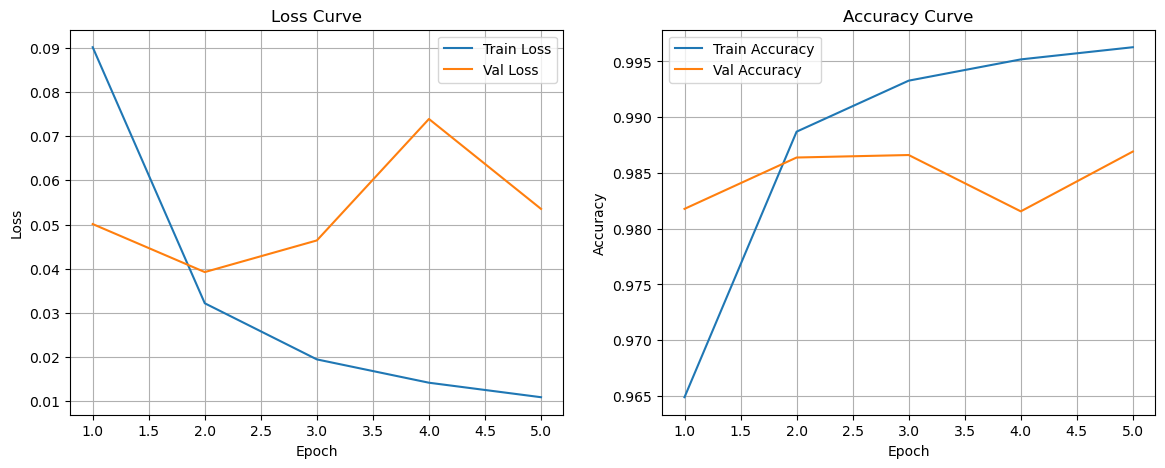

In [52]:
import matplotlib.pyplot as plt

def plot_training_curves(history):
    plt.figure(figsize=(14,5))


    epochs = range(1, len(history.history['accuracy']) + 1)
    # ---- LOSS ----
    plt.subplot(1,2,1)
    plt.plot(epochs,history.history['loss'], label='Train Loss')
    plt.plot(epochs,history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # ---- ACC ----
    plt.subplot(1,2,2)
    plt.plot(epochs,history.history['accuracy'], label='Train Accuracy')
    plt.plot(epochs,history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    plt.show()

# USE:
plot_training_curves(history_cb)


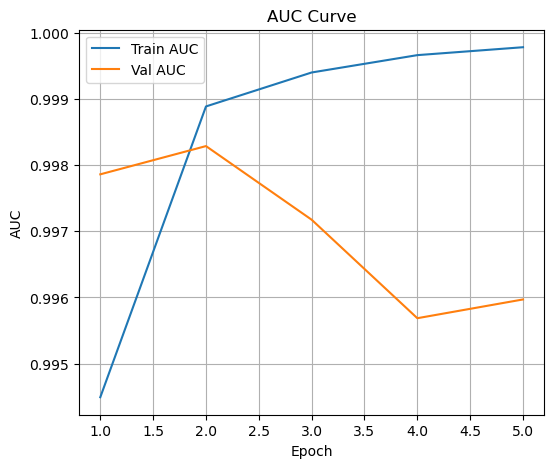

In [53]:
def plot_auc(history):
    if 'auc' not in history.history:
        print("AUC not found in metrics.")
        return
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.figure(figsize=(6,5))
    plt.plot(epochs,history.history['auc'], label='Train AUC')
    plt.plot(epochs,history.history['val_auc'], label='Val AUC')
    plt.title('AUC Curve')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()
    plt.grid()
    plt.show()

# USE:
plot_auc(history_cb)


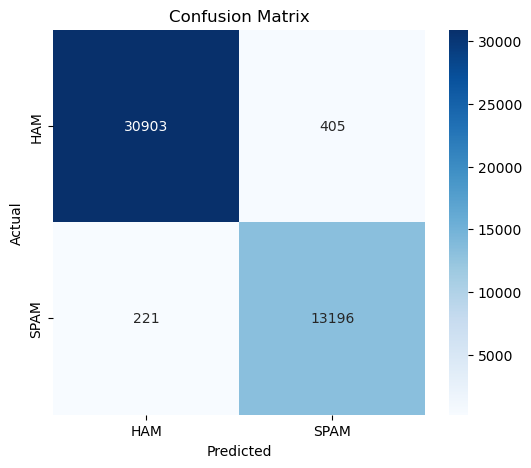

array([[30903,   405],
       [  221, 13196]])

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    

    cm = confusion_matrix(y_test, y_pred_cb)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["HAM", "SPAM"],
                yticklabels=["HAM", "SPAM"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return cm

# USE:
plot_confusion_matrix(model_cb, X_test, y_test)


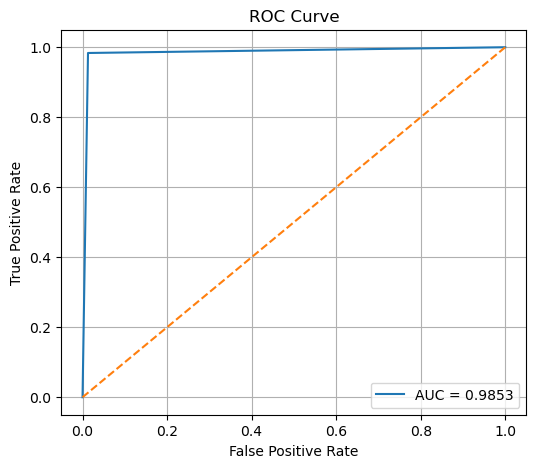

In [55]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test):
    # y_prob = model.predict(X_test).ravel()
    fpr, tpr, _ = roc_curve(y_test, y_pred_cb)
    auc_score = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

# USE:
plot_roc_curve(model_cb, X_test, y_test)


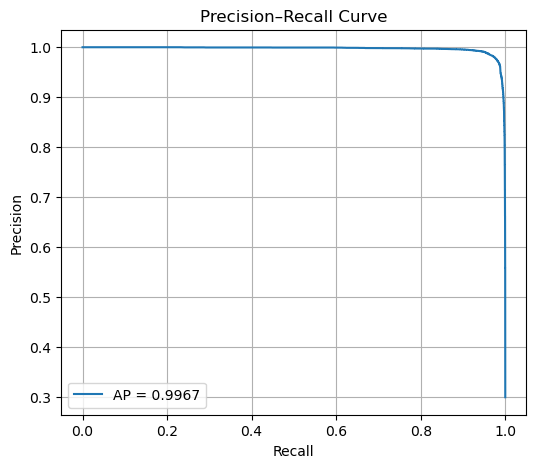

In [56]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall(model, X_test, y_test):
    # y_prob = model.predict(X_test).ravel()

    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_cb)
    ap = average_precision_score(y_test, y_pred_prob_cb)

    plt.figure(figsize=(6,5))
    plt.plot(recall, precision, label=f"AP = {ap:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision–Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()

# USE:
plot_precision_recall(model_cb, X_test, y_test)


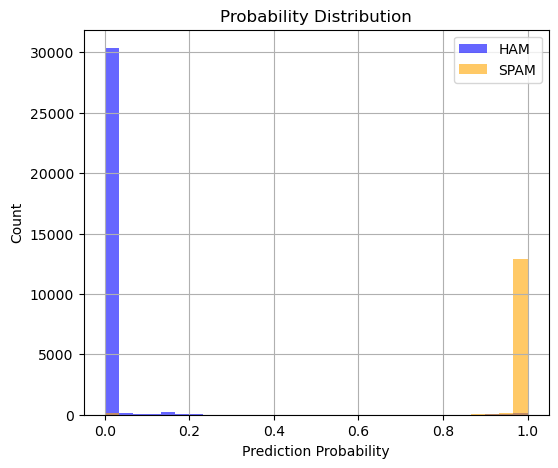

In [57]:
def plot_probability_histogram(model, X_test, y_test):
    # y_prob = model.predict(X_test).ravel()

    plt.figure(figsize=(6,5))
    plt.hist(y_pred_prob_cb[y_test==0], bins=30, alpha=0.6, label="HAM", color="blue")
    plt.hist(y_pred_prob_cb[y_test==1], bins=30, alpha=0.6, label="SPAM", color="orange")
    plt.xlabel("Prediction Probability")
    plt.ylabel("Count")
    plt.title("Probability Distribution")
    plt.legend()
    plt.grid()
    plt.show()

# USE:
plot_probability_histogram(model_cb, X_test, y_test)


CNN + BILSTM + FEDERATED LEARNING

In [58]:
# ===========================
# STEP 1 — IMPORTS & GLOBAL SETUP
# ===========================

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import os

# -------------------------------------------------------------
# 1. Reproducibility
# -------------------------------------------------------------
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# -------------------------------------------------------------
# 2. Global Hyperparameters
# -------------------------------------------------------------
MAX_LEN = 300
VOCAB_SIZE = 20000
EMBED_DIM = 150

# Federated Learning Defaults
NUM_ROUNDS = 5
LOCAL_EPOCHS = 1
BATCH_SIZE = 256    
PATIENCE_ROUNDS = 3      # EarlyStopping patience for federated rounds
MONITOR_METRIC = "val_loss"   # could be 'val_auc' if preferred

# -------------------------------------------------------------

# -------------------------------------------------------------
# 5. Plotting defaults
# -------------------------------------------------------------
plt.style.use("seaborn-v0_8")
sns.set_palette("deep")
print("Step 1 setup complete.")


Step 1 setup complete.


In [59]:
# ===========================
# STEP 2 — Model builder (multi-kernel CNN + pooling + fusion + BiLSTM)
# ===========================

import tensorflow as tf
from tensorflow.keras import layers, Model

# Path to the architecture diagram image (for reference / presentation)
# ARCH_IMAGE_PATH = "/mnt/data/A_flowchart_diagram_illustrates_a_Hybrid_Multi-Ker.png"

def build_hybrid_cnn_bilstm(MAX_LEN=300,
                            VOCAB_SIZE=20000,
                            EMBED_DIM=150,
                            conv_filters=128,
                            lstm_units=128,
                            dropout_rate=0.4):
    """
    Hybrid model:
      Input -> Embedding -> SpatialDropout1D
      -> three parallel Conv1D branches (kernel sizes 3,5,7)
      -> Concatenate -> MaxPooling1D (reduce time dim)
      -> 1x1 Fusion Conv -> LayerNorm -> ReLU
      -> Bidirectional LSTM -> GlobalMaxPool (if return_sequences=True) or direct readout
      -> Dense -> Dropout -> Output (sigmoid)

    Notes:
      - Pooling is applied AFTER concatenation to reduce sequence length before LSTM,
        giving a large speed-up with minimal loss of information.
      - LayerNormalization used instead of BatchNormalization (stable with variable batch sizes).
    """

    inp = layers.Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_tokens")

    # Embedding: maps token ids to D-dimensional vectors
    x = layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=MAX_LEN, name="embedding")(inp)

    # Spatial dropout drops entire embedding channels (good regularizer for text)
    x = layers.SpatialDropout1D(0.2, name="spatial_dropout")(x)

    # Parallel convolutional branches (multi-kernel)
    # Branch 1: kernel size 3
    b1 = layers.Conv1D(filters=conv_filters, kernel_size=3, padding="same", name="conv_k3")(x)
    b1 = layers.LayerNormalization(name="ln_k3")(b1)
    b1 = layers.Activation("relu", name="act_k3")(b1)

    # Branch 2: kernel size 5
    b2 = layers.Conv1D(filters=conv_filters, kernel_size=5, padding="same", name="conv_k5")(x)
    b2 = layers.LayerNormalization(name="ln_k5")(b2)
    b2 = layers.Activation("relu", name="act_k5")(b2)

    # Branch 3: kernel size 7
    b3 = layers.Conv1D(filters=conv_filters, kernel_size=7, padding="same", name="conv_k7")(x)
    b3 = layers.LayerNormalization(name="ln_k7")(b3)
    b3 = layers.Activation("relu", name="act_k7")(b3)

    # Concatenate multi-scale features along channel axis
    merged = layers.Concatenate(axis=-1, name="concat_branches")([b1, b2, b3])
    # merged shape: (batch, time, conv_filters * 3)

    # --- Pooling (to reduce sequence length before LSTM) ---
    # Reduces computation for the BiLSTM significantly.
    pooled = layers.MaxPooling1D(pool_size=2, strides=2, padding="same", name="pool_after_concat")(merged)
    # Example: MAX_LEN 300 -> pooled length 150

    # Fusion conv (1x1) to mix channel information after concatenation + pooling
    fused = layers.Conv1D(filters=conv_filters, kernel_size=1, padding="same", name="fuse_conv")(pooled)
    fused = layers.LayerNormalization(name="ln_fuse")(fused)
    fused = layers.Activation("relu", name="act_fuse")(fused)

    # Bidirectional LSTM: process reduced-length sequence
    # return_sequences=False -> returns last output (we could also use return_sequences=True + pooling/attention)
    bilstm = layers.Bidirectional(
        layers.LSTM(lstm_units, return_sequences=False, name="lstm_core"),
        name="bilstm"
    )(fused)

    # Dense head + dropout
    dense = layers.Dense(128, activation="relu", name="dense_128")(bilstm)
    dense = layers.Dropout(dropout_rate, name="dropout")(dense)

    out = layers.Dense(1, activation="sigmoid", name="output")(dense)

    model = Model(inputs=inp, outputs=out, name="hybrid_cnn_multikernel_bilstm_pool")

    # Compile with sensible defaults (binary classification)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="binary_crossentropy",
        metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
    )

    return model

# ---------- Smoke test / instantiate and summarize ----------
model_hybrid = build_hybrid_cnn_bilstm(MAX_LEN=MAX_LEN, VOCAB_SIZE=VOCAB_SIZE, EMBED_DIM=EMBED_DIM)
print("\nModel summary:\n")
model_hybrid.summary()

# Helpful reminder where the architecture diagram is stored (open it in your file browser / Canva)
# print(f"\nArchitecture diagram file (reference): {ARCH_IMAGE_PATH}")


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Model summary:



Model: "hybrid_cnn_multikernel_bilstm_pool"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_tokens        │ (None, 300)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 300, 150)  │  3,000,000 │ input_tokens[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout     │ (None, 300, 150)  │          0 │ embedding[0][0]   │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_k3 (Conv1D)    │ (None, 300, 128)  │     57,728 │ spatial_dropout[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_k5 (Conv1D)    │ (None, 300, 128)  │     96,128 │ spatial_dropout[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_k7 (Conv1D)    │ (None, 300, 128)  │    134,528 │ spatial_dropout[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ln_k3               │ (None, 300, 128)  │        256 │ conv_k3[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ln_k5               │ (None, 300, 128)  │        256 │ conv_k5[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ln_k7               │ (None, 300, 128)  │        256 │ conv_k7[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ act_k3 (Activation) │ (None, 300, 128)  │          0 │ ln_k3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ act_k5 (Activation) │ (None, 300, 128)  │          0 │ ln_k5[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ act_k7 (Activation) │ (None, 300, 128)  │          0 │ ln_k7[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_branches     │ (None, 300, 384)  │          0 │ act_k3[0][0],     │
│ (Concatenate)       │                   │            │ act_k5[0][0],     │
│                     │                   │            │ act_k7[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool_after_concat   │ (None, 150, 384)  │          0 │ concat_branches[… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fuse_conv (Conv1D)  │ (None, 150, 128)  │     49,280 │ pool_after_conca… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ln_fuse             │ (None, 150, 128)  │        256 │ fuse_conv[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ act_fuse            │ (None, 150, 128)  │          0 │ ln_fuse[0][0]     │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bilstm              │ (None, 256)       │    263,168 │ act_fuse[0][0]    │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_128 (Dense)   │ (None, 128)       │     32,896 │ bilstm[0][0]    

 Total params: 3,634,881 (13.87 MB)

 Trainable params: 3,634,881 (13.87 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# ===========================
# STEP 3 — Dataset Checks & TF Data Pipelines
# ===========================

import numpy as np
import tensorflow as tf

# -------------------------------------------------------------
# 1. Verify incoming dataset shapes (these must match your data)
# -------------------------------------------------------------
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_valid:", X_valid.shape)
print("y_valid:", y_valid.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

# Safety check: ensure dtype is integer for token IDs
X_train = np.asarray(X_train, dtype=np.int32)
X_valid = np.asarray(X_valid, dtype=np.int32)
X_test  = np.asarray(X_test, dtype=np.int32)

y_train = np.asarray(y_train, dtype=np.int32)
y_valid = np.asarray(y_valid, dtype=np.int32)
y_test  = np.asarray(y_test, dtype=np.int32)

# -------------------------------------------------------------
# 2. Build tf.data.Dataset pipelines
# -------------------------------------------------------------
def make_dataset(X, y, batch_size, shuffle=False):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(X), reshuffle_each_iteration=True)
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return ds

train_ds = make_dataset(X_train, y_train, batch_size=BATCH_SIZE, shuffle=True)
valid_ds = make_dataset(X_valid, y_valid, batch_size=BATCH_SIZE, shuffle=False)
test_ds  = make_dataset(X_test,  y_test,  batch_size=BATCH_SIZE, shuffle=False)

print("\nDataset pipelines ready:")
print(f"Train batches: {len(train_ds)}")
print(f"Valid batches: {len(valid_ds)}")
print(f"Test batches:  {len(test_ds)}")


X_train: (208716, 300)
y_train: (208716,)
X_valid: (44725, 300)
y_valid: (44725,)
X_test: (44725, 300)
y_test: (44725,)

Dataset pipelines ready:
Train batches: 816
Valid batches: 175
Test batches:  175


Total train samples: 208716
Planned client sizes: 52179 52179 83486 20872
Client 0: size=52179, counts={np.int32(0): 36525, np.int32(1): 15654}, ratios=0:0.700,1:0.300
Client 1: size=52179, counts={np.int32(0): 36526, np.int32(1): 15653}, ratios=0:0.700,1:0.300
Client 2: size=83486, counts={np.int32(1): 25046, np.int32(0): 58440}, ratios=0:0.700,1:0.300
Client 3: size=20872, counts={np.int32(0): 14610, np.int32(1): 6262}, ratios=0:0.700,1:0.300


In [65]:
# ===========================
# STEP 5 — Compute class weights (simple version)
# ===========================

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from collections import Counter

print("Class distribution in training set:")
print(Counter(y_train))

# ---- Global Class Weights (recommended) ----
classes = np.array([0, 1])
class_weights_values = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

GLOBAL_CLASS_WEIGHTS = {
    0: float(class_weights_values[0]),
    1: float(class_weights_values[1])
}

print("\nGlobal class weights (use these for client training):")
print(GLOBAL_CLASS_WEIGHTS)

# ---- Optional: per-client class weights ----
try:
    PER_CLIENT_CLASS_WEIGHTS = {}
    for i, (Xi, yi) in enumerate(clients):
        cw = compute_class_weight(
            class_weight='balanced',
            classes=classes,
            y=yi
        )
        PER_CLIENT_CLASS_WEIGHTS[i] = {
            0: float(cw[0]),
            1: float(cw[1])
        }
        print(f"\nClient {i} class distribution: {Counter(yi)}")
        print(f"Client {i} class weights: {PER_CLIENT_CLASS_WEIGHTS[i]}")
except:
    print("\n(No clients found yet — generate them in Step 4 first.)")


Class distribution in training set:
Counter({np.int32(0): 146101, np.int32(1): 62615})

Global class weights (use these for client training):
{0: 0.7142866920828742, 1: 1.6666613431286432}

Client 0 class distribution: Counter({np.int32(0): 36525, np.int32(1): 15654})
Client 0 class weights: {0: 0.7142915811088296, 1: 1.6666347259486394}

Client 1 class distribution: Counter({np.int32(0): 36526, np.int32(1): 15653})
Client 1 class weights: {0: 0.7142720254065598, 1: 1.6667411997700121}

Client 2 class distribution: Counter({np.int32(0): 58440, np.int32(1): 25046})
Client 2 class weights: {0: 0.7142881587953457, 1: 1.6666533578216083}

Client 3 class distribution: Counter({np.int32(0): 14610, np.int32(1): 6262})
Client 3 class weights: {0: 0.7143052703627653, 1: 1.6665602044075376}


In [66]:
# ===========================
# STEP 6 — client_update(): local training on each client
# ===========================

import tensorflow as tf

def client_update(server_weights,
                  X_client, y_client,
                  local_epochs=1,
                  batch_size=64,
                  class_weight=None,
                  verbose=0):
    """
    Performs one client's local training.
    
    Steps:
      (1) Build a fresh hybrid model
      (2) Load server weights
      (3) Train locally for local_epochs
      (4) Return updated weights + training history
    """
    
    # 1) Build model
    client_model = build_hybrid_cnn_bilstm(
        MAX_LEN=MAX_LEN,
        VOCAB_SIZE=VOCAB_SIZE,
        EMBED_DIM=EMBED_DIM
    )

    # 2) Load server's global weights
    client_model.set_weights(server_weights)

    # 3) Train locally
    history = client_model.fit(
        X_client, y_client,
        epochs=local_epochs,
        batch_size=batch_size,
        class_weight=class_weight,
        verbose=verbose  # 0 = silent, 1 = per epoch
    )

    # 4) Return updated weights + last local metrics
    updated_weights = client_model.get_weights()
    hist_dict = history.history

    return updated_weights, hist_dict


In [70]:
# ===========================
# STEP 7 — FedAvg aggregation + divergence calculation
# ===========================

import numpy as np

def weighted_average_weights(client_weights_list, client_sizes):
    """
    FedAvg:
    Weighted average of client weights proportional to client dataset size.
    
    Args:
        client_weights_list : list of weight lists (one per client)
        client_sizes        : list of client dataset sizes
        
    Returns:
        aggregated_weights  : list of numpy arrays (same format as model.get_weights())
    """

    total_size = float(sum(client_sizes))
    num_layers = len(client_weights_list[0])

    # Initialize with zeros
    new_weights = []
    for layer_index in range(num_layers):
        layer_sum = np.zeros_like(client_weights_list[0][layer_index])
        
        # Weighted contribution from each client
        for cw, size in zip(client_weights_list, client_sizes):
            layer_sum += (size / total_size) * cw[layer_index]
        
        new_weights.append(layer_sum)

    return new_weights


def weights_l2_distance(w_global, w_client):
    """
    Computes L2 distance between two sets of model weights.
    Helps visualize divergence between clients and server.
    """
    total = 0.0
    for wg, wc in zip(w_global, w_client):
        diff = np.array(wg) - np.array(wc)
        total += np.sum(diff * diff)
    return float(np.sqrt(total))


In [71]:
# ===========================
# STEP 8 — Federated Training Loop (FedAvg + EarlyStopping)
# ===========================

import numpy as np
import tensorflow as tf
import time

def fedavg_training(
    clients,
    X_valid, y_valid,
    num_rounds=40,
    local_epochs=1,
    batch_size=64,
    class_weight=GLOBAL_CLASS_WEIGHTS,
    patience=3,            # rounds for early stopping
    monitor="val_loss",    # server-side early stopping metric
    verbose=1
):
    """
    Full Federated Training Loop:
      - Sends global weights to each client
      - Each client trains locally
      - Aggregates updates via FedAvg
      - Server evaluates on central validation set
      - Applies EarlyStopping based on server val metric
    """

    # ---- Initialize server model ----
    server_model = build_hybrid_cnn_bilstm(
        MAX_LEN=MAX_LEN,
        VOCAB_SIZE=VOCAB_SIZE,
        EMBED_DIM=EMBED_DIM
    )
    server_weights = server_model.get_weights()

    # ---- Storage for plots (server metrics, per-client metrics, divergence) ----
    history_server = {
        "round": [],
        "val_loss": [],
        "val_accuracy": [],
        "val_auc": []
    }
    client_histories = {i: {"round": [], "train_loss": [], "train_acc": []}
                        for i in range(len(clients))}
    weight_divergence = {i: [] for i in range(len(clients))}

    # ---- For EarlyStopping ----
    best_metric = np.inf
    best_round = 0
    best_weights = None
    rounds_without_improvement = 0

    # --------------------------
    # Federated Rounds
    # --------------------------
    for r in range(1, num_rounds + 1):
        if verbose:
            print(f"\n=== Federated Round {r}/{num_rounds} ===")

        client_weights_list = []
        client_sizes = []

        # ---- Client updates ----
        for i, (Xc, yc) in enumerate(clients):
            client_sizes.append(len(yc))

            w_i, hist_i = client_update(
                server_weights=server_weights,
                X_client=Xc,
                y_client=yc,
                local_epochs=local_epochs,
                batch_size=batch_size,
                class_weight=class_weight,
                verbose=0
            )

            client_weights_list.append(w_i)

            # Record last epoch metrics
            train_loss = hist_i["loss"][-1]
            train_acc = hist_i.get("accuracy", hist_i.get("acc", [None]))[-1]

            client_histories[i]["round"].append(r)
            client_histories[i]["train_loss"].append(train_loss)
            client_histories[i]["train_acc"].append(train_acc)

            # ---- Divergence ----
            div = weights_l2_distance(server_weights, w_i)
            weight_divergence[i].append(div)

            if verbose:
                print(f" Client {i}: size={len(yc)}, loss={train_loss:.4f}, acc={train_acc:.4f}, div={div:.4f}")

        # ---- Server Aggregation (FedAvg) ----
        new_server_weights = weighted_average_weights(client_weights_list, client_sizes)
        server_weights = new_server_weights
        server_model.set_weights(server_weights)

        # ---- Server Validation ----
        val_loss, val_acc, val_auc = server_model.evaluate(X_valid, y_valid, verbose=0)

        history_server["round"].append(r)
        history_server["val_loss"].append(val_loss)
        history_server["val_accuracy"].append(val_acc)
        history_server["val_auc"].append(val_auc)

        if verbose:
            print(f" Round {r} VAL → loss={val_loss:.4f}, acc={val_acc:.4f}, auc={val_auc:.4f}")

        # ---- EarlyStopping logic ----
        current_metric = val_loss  # monitor='val_loss'

        if current_metric < best_metric:
            best_metric = current_metric
            best_round = r
            best_weights = server_model.get_weights()
            rounds_without_improvement = 0
        else:
            rounds_without_improvement += 1

        if rounds_without_improvement >= patience:
            if verbose:
                print(f"\nEarlyStopping: No improvement for {patience} rounds.")
                print(f"Restoring best model from round {best_round} (val_loss={best_metric:.4f}).")
            server_model.set_weights(best_weights)
            break

    # ---- Final Output ----
    return server_model, history_server, client_histories, weight_divergence


In [72]:
# ===========================
# STEP 9 — Visualization Functions
# ===========================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

sns.set_style("whitegrid")


# -----------------------------------------------------------
# 1. Plot server metrics (val_loss, val_acc, val_auc)
# -----------------------------------------------------------
def plot_server_metrics(history_server):
    rounds = history_server["round"]

    plt.figure(figsize=(18,5))

    plt.subplot(1,3,1)
    plt.plot(rounds, history_server["val_loss"], label="val_loss", marker='o')
    plt.title("Validation Loss (Server)")
    plt.xlabel("Round"); plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(rounds, history_server["val_accuracy"], label="val_acc", marker='o')
    plt.title("Validation Accuracy (Server)")
    plt.xlabel("Round"); plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1,3,3)
    plt.plot(rounds, history_server["val_auc"], label="val_auc", marker='o')
    plt.title("Validation AUC (Server)")
    plt.xlabel("Round"); plt.ylabel("AUC")
    plt.legend()

    plt.show()


# -----------------------------------------------------------
# 2. Per-client training loss & accuracy
# -----------------------------------------------------------
def plot_client_training(client_histories):
    plt.figure(figsize=(18,6))

    # Loss
    plt.subplot(1,2,1)
    for c in client_histories:
        plt.plot(client_histories[c]["round"], client_histories[c]["train_loss"], label=f"Client {c}")
    plt.title("Client Train Loss per Round")
    plt.xlabel("Round"); plt.ylabel("Loss")
    plt.legend()

    # Accuracy
    plt.subplot(1,2,2)
    for c in client_histories:
        plt.plot(client_histories[c]["round"], client_histories[c]["train_acc"], label=f"Client {c}")
    plt.title("Client Train Accuracy per Round")
    plt.xlabel("Round"); plt.ylabel("Accuracy")
    plt.legend()

    plt.show()


# -----------------------------------------------------------
# 3. Weight Divergence Plot
# -----------------------------------------------------------
def plot_weight_divergence(weight_divergence):
    plt.figure(figsize=(10,5))
    for c in weight_divergence:
        plt.plot(weight_divergence[c], marker='o', label=f"Client {c}")
    plt.title("Client Weight Divergence from Server")
    plt.xlabel("Round"); plt.ylabel("L2 Distance")
    plt.legend()
    plt.show()


# -----------------------------------------------------------
# 4. Confusion matrix
# -----------------------------------------------------------
def plot_confusion(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["HAM", "SPAM"], yticklabels=["HAM", "SPAM"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred, target_names=["HAM", "SPAM"]))


# -----------------------------------------------------------
# 5. ROC curve
# -----------------------------------------------------------
def plot_roc(model, X_test, y_test):
    y_prob = model.predict(X_test).flatten()
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0,1], [0,1], linestyle='--', color='gray')
    plt.title("ROC Curve")
    plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.legend()
    plt.show()


# -----------------------------------------------------------
# 6. Precision–Recall curve
# -----------------------------------------------------------
def plot_precision_recall(model, X_test, y_test):
    y_prob = model.predict(X_test).flatten()
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    plt.figure(figsize=(6,5))
    plt.plot(recall, precision)
    plt.title("Precision–Recall Curve")
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.show()


# -----------------------------------------------------------
# 7. Probability Histogram
# -----------------------------------------------------------
def plot_probability_hist(model, X_test, y_test):
    y_prob = model.predict(X_test).flatten()

    plt.figure(figsize=(8,5))
    plt.hist(y_prob[y_test==0], bins=50, alpha=0.7, label="HAM")
    plt.hist(y_prob[y_test==1], bins=50, alpha=0.7, label="SPAM")
    plt.title("Prediction Probability Distribution")
    plt.xlabel("Predicted Probability"); plt.ylabel("Count")
    plt.legend()
    plt.show()


In [ ]:
# ===========================
# STEP 10 — Final Evaluation + Save Model + Prediction Function
# ===========================

import tensorflow as tf
import numpy as np
import pickle
import os

# -----------------------------------------------------------
# 1. Evaluate final global model on the test set
# -----------------------------------------------------------
def evaluate_global_model(model, X_test, y_test):
    print("\n================ FINAL TEST EVALUATION ================\n")
    test_loss, test_acc, test_auc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss  : {test_loss:.4f}")
    print(f"Test Acc   : {test_acc:.4f}")
    print(f"Test AUC   : {test_auc:.4f}\n")

    plot_confusion(model, X_test, y_test)
    plot_roc(model, X_test, y_test)
    plot_precision_recall(model, X_test, y_test)
    plot_probability_hist(model, X_test, y_test)








In [77]:
server_model, history_server, client_histories, weight_divergence = fedavg_training(
    clients=clients,
    X_valid=X_valid,
    y_valid=y_valid,
    num_rounds=NUM_ROUNDS,
    local_epochs=LOCAL_EPOCHS,
    batch_size=BATCH_SIZE,
    class_weight=GLOBAL_CLASS_WEIGHTS,
    patience=PATIENCE_ROUNDS,
    monitor="val_loss",
    verbose=1
)


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



=== Federated Round 1/5 ===
 Client 0: size=52179, loss=0.1913, acc=0.9158, div=27.0809
 Client 1: size=52179, loss=0.1878, acc=0.9155, div=27.0172
 Client 2: size=83486, loss=0.1400, acc=0.9424, div=33.3381
 Client 3: size=20872, loss=0.2716, acc=0.8703, div=17.2487
 Round 1 VAL → loss=0.1381, acc=0.9648, auc=0.9962

=== Federated Round 2/5 ===
 Client 0: size=52179, loss=0.0736, acc=0.9739, div=23.8238
 Client 1: size=52179, loss=0.0795, acc=0.9721, div=23.9155
 Client 2: size=83486, loss=0.0700, acc=0.9751, div=30.8729
 Client 3: size=20872, loss=0.0972, acc=0.9644, div=13.6045
 Round 2 VAL → loss=0.0545, acc=0.9806, auc=0.9978

=== Federated Round 3/5 ===
 Client 0: size=52179, loss=0.0515, acc=0.9824, div=21.3901
 Client 1: size=52179, loss=0.0533, acc=0.9814, div=21.7395
 Client 2: size=83486, loss=0.0474, acc=0.9834, div=28.2714
 Client 3: size=20872, loss=0.0681, acc=0.9758, div=12.2923
 Round 3 VAL → loss=0.0477, acc=0.9831, auc=0.9980

=== Federated Round 4/5 ===
 Client 0: 

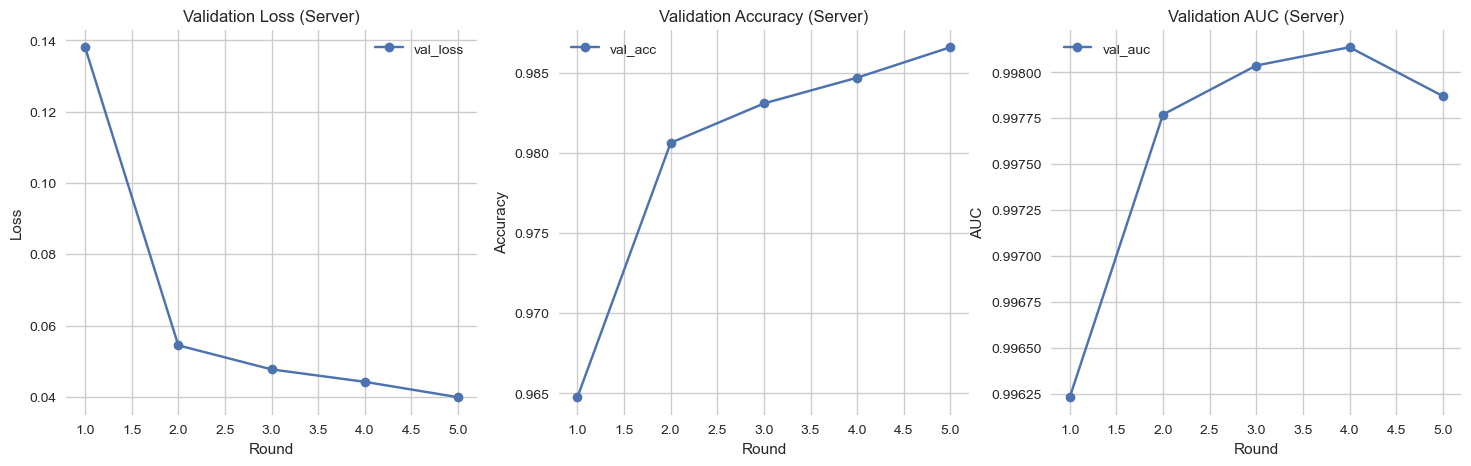

In [78]:
plot_server_metrics(history_server)


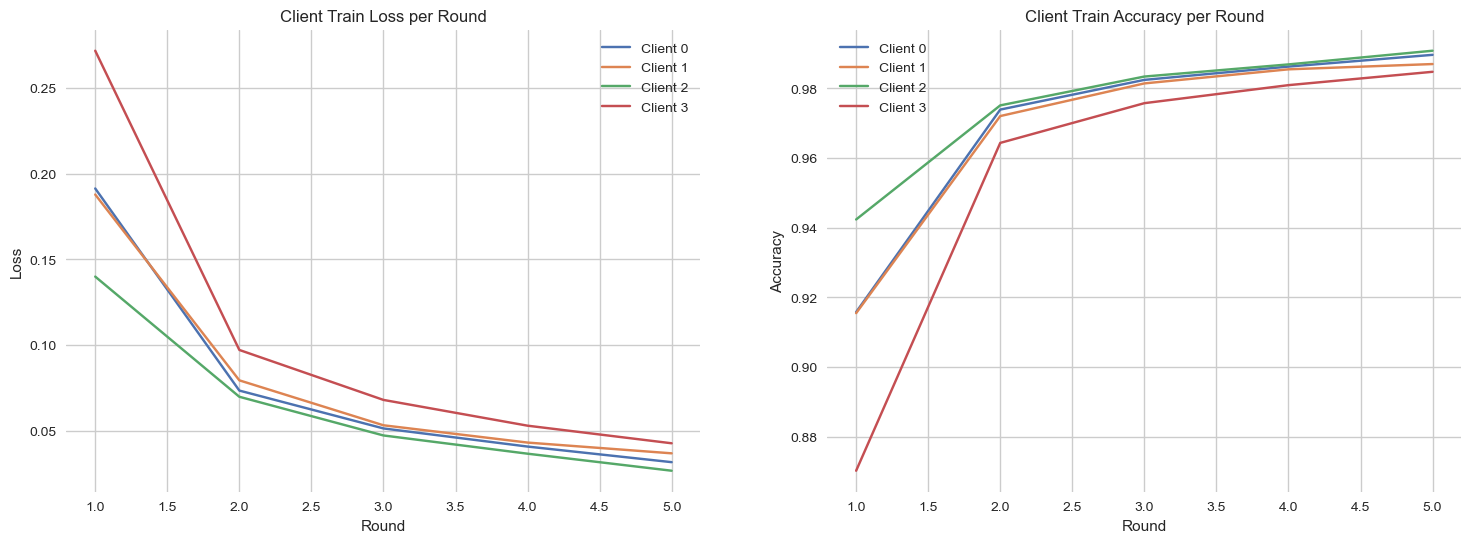

In [79]:
plot_client_training(client_histories)


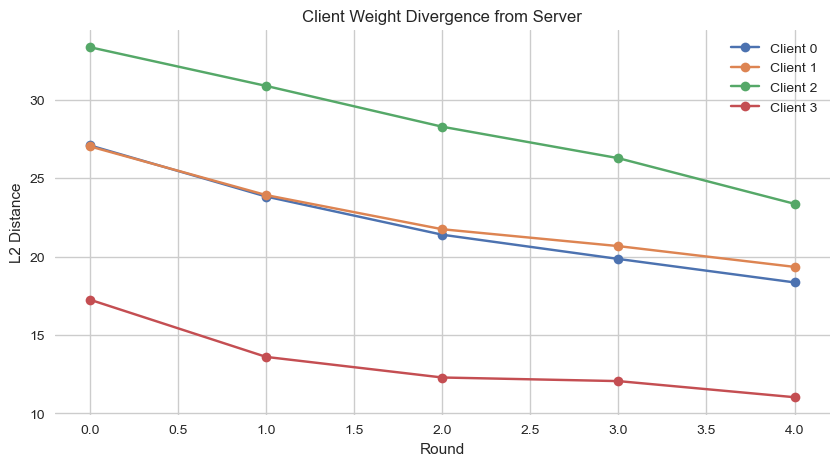

In [80]:
plot_weight_divergence(weight_divergence)



================ FINAL TEST EVALUATION ================

Test Loss  : 0.0439
Test Acc   : 0.9856
Test AUC   : 0.9972

1398/1398 ━━━━━━━━━━━━━━━━━━━━ 91s 65ms/step


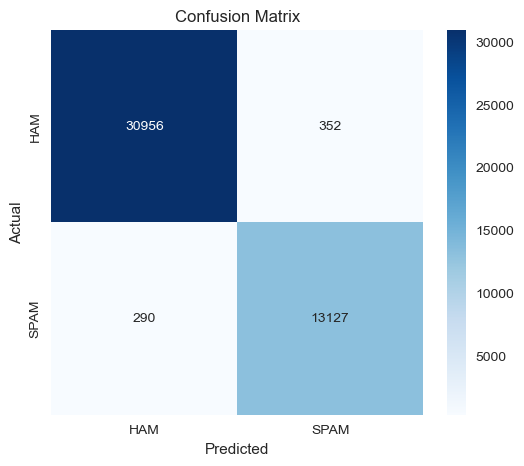


Classification Report:

              precision    recall  f1-score   support

         HAM       0.99      0.99      0.99     31308
        SPAM       0.97      0.98      0.98     13417

    accuracy                           0.99     44725
   macro avg       0.98      0.98      0.98     44725
weighted avg       0.99      0.99      0.99     44725

1398/1398 ━━━━━━━━━━━━━━━━━━━━ 86s 61ms/step


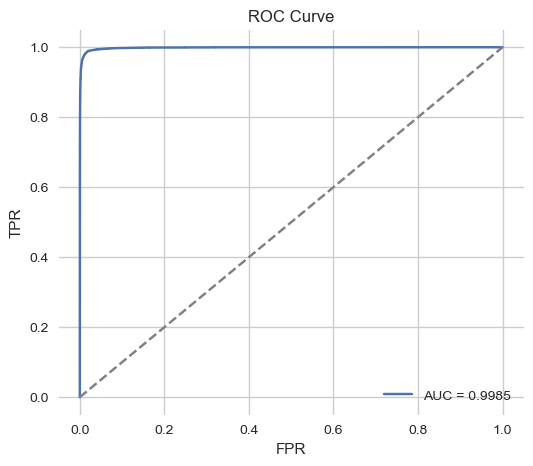

1398/1398 ━━━━━━━━━━━━━━━━━━━━ 88s 63ms/step


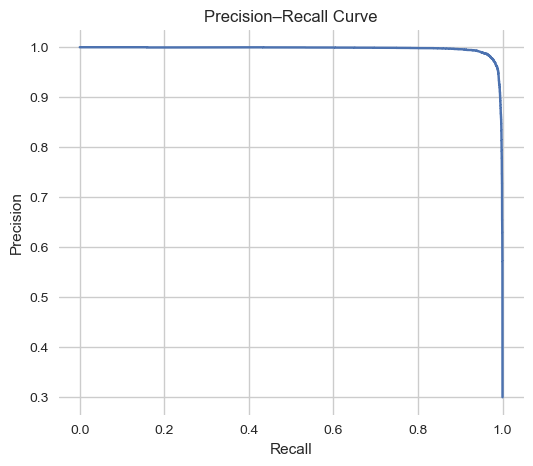

1398/1398 ━━━━━━━━━━━━━━━━━━━━ 85s 61ms/step


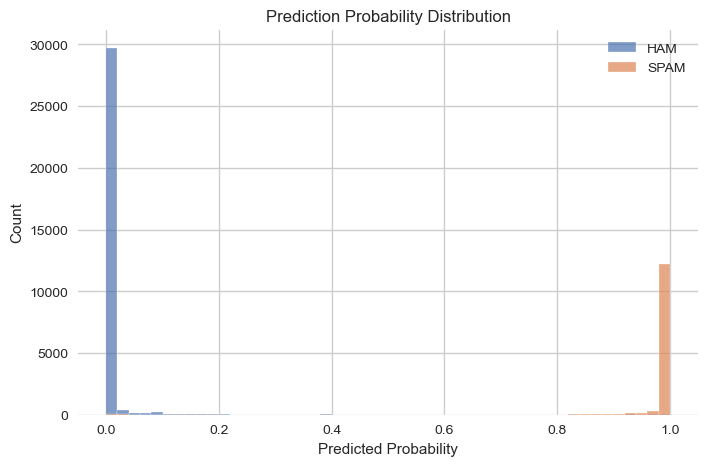

In [81]:
evaluate_global_model(server_model, X_test, y_test)


In [85]:
y_pred_prob_fl = server_model.predict(X_test)
y_pred_fl = (y_pred_prob_fl > 0.5).astype(int)
acc  = accuracy_score(y_test, y_pred_fl)
prec = precision_score(y_test, y_pred_fl)
rec  = recall_score(y_test, y_pred_fl)
f1   = f1_score(y_test, y_pred_fl)

print("\n===== TEST RESULTS =====")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-score  : {f1:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred_fl, digits=4))

1398/1398 ━━━━━━━━━━━━━━━━━━━━ 85s 60ms/step

===== TEST RESULTS =====
Accuracy  : 0.9856
Precision : 0.9739
Recall    : 0.9784
F1-score  : 0.9761

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9907    0.9888    0.9897     31308
           1     0.9739    0.9784    0.9761     13417

    accuracy                         0.9856     44725
   macro avg     0.9823    0.9836    0.9829     44725
weighted avg     0.9857    0.9856    0.9857     44725



In [124]:
cnn = tf.keras.models.load_model("cnn_spam_model.h5", compile=False)

c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\layer.py:970: UserWarning: Layer 'conv1d_2' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [125]:
lstm = tf.keras.models.load_model("lstm_spam_model.h5", compile=False)

ValueError: Unknown layer: 'NotEqual'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [118]:
def predict_email(text, vectorizer, model):
    seq = vectorizer([text])
    prob = model.predict(seq)[0][0]
    label = "SPAM" if prob > 0.5 else "HAM"
    print(f"Prediction: {label} (prob={prob:.4f})")
    return label, prob

# Example:
predict_email("Hey I am coming to meet you tomorrow.Do this work properly or i gonna fire u", vectorizer, model_cb)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Prediction: HAM (prob=0.0002)


('HAM', np.float32(0.00017468235))

In [119]:
predict_email("Hey I am coming to meet you tomorrow.Do this work properly or i gonna fire u", vectorizer, model_lstm)

NameError: name 'model_lstm' is not defined

In [120]:
predict_email("Hey I am coming to meet you tomorrow.Do this work properly or i gonna fire u", vectorizer, model_cnn_lstm)

NameError: name 'model_cnn_lstm' is not defined

In [121]:
predict_email("Hey I am coming to meet you tomorrow.Do this work properly or i gonna fire u", vectorizer, model_cnn)

NameError: name 'model_cnn' is not defined

In [122]:
predict_email("Hey I am coming to meet you tomorrow.Do this work properly or i gonna fire u", vectorizer, model_bilstm)

NameError: name 'model_bilstm' is not defined

In [123]:
predict_email("Hey I am coming to meet you tomorrow.Do this work properly or i gonna fire u", vectorizer, model_cb)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Prediction: HAM (prob=0.0002)


('HAM', np.float32(0.00017468235))